In [1]:
import pandas as pd
import numpy as np

url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Azuay"]
filtro = df.iloc[0].loc['19/3/2020':]
TASA_CRECIMIENTO = int(filtro.mean()*3)
print(TASA_CRECIMIENTO)

345


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS Y MATRICES DE ENTRADA
HOSPITALES = 1
CAMAS = 254
RESPIRADORES=5
Cuidados_Intensivos=6
PERSONAL=300

INFECTADOS=671
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100


adultos_F=[]
adultos_M=[]

mayores_F=[]
mayores_M=[]

menores_F=[]
menores_M=[]

menores={}
adultos={}
mayores={}
atendidos={}
gastos_Totales=[]
cantidad_Personal={}
camas_disponibles={}
respiradores_disponibles={}
unidades_totales={}


persona_recuperadas={}
persona_fallecidas={}

nuemonia_adultos_F=[]
cuidados_adultos_F=[]
fallecidos_adultos_F=[]
recuperados_adultos_F=[]
nuemonia_adultos_M=[]
cuidados_adultos_M=[]
fallecidos_adultos_M=[]
recuperados_adultos_M=[]




nuemonia_mayores_F=[]
cuidados_mayores_F=[]
fallecidos_mayores_F=[]
recuperados_mayores_F=[]
nuemonia_mayores_M=[]
cuidados_mayores_M=[]
fallecidos_mayores_M=[]
recuperados_mayores_M=[]

sintomas_menores_F=[]
sintomas_menores_M=[]
neumonia_menores_F=[]
neumonia_menores_M=[]
ciudados_menores_F=[]
ciudados_menores_M=[]
fallecidos_menores_F=[]
fallecidos_menores_M=[]
recuperados_menores_F=[]
recuperados_menores_M=[]




class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_Cuidados_Intensivos, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_Cuidados_Intensivos=num_Cuidados_Intensivos
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.Cuidados_Intensivos = simpy.Resource(env, num_Cuidados_Intensivos)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar_sala(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente ", paciente, "salió de la atencion medica en el día ", int(self.env.now))
        
    def personal_medico(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
            
    def Cuidados_Intensivoss(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente", paciente, "salió de la Cuidados Intensivos en el día ", int(self.env.now))
    
    
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        mayores[env.now] = mayores[env.now] + 1 if env.now in mayores else  1
        
        sexo= random.randint(1,7)
        if(sexo<=3):
            mayores_M.append(1)
          
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                nuemonia_mayores_M.append(1)

               
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente mayor ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar_sala(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.personal_medico(paciente))
                                #arrive3 = env.now
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_mayores_M.append(1)
                               
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente mayor ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_mayores_M.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_mayores_M.append(1)

                                    else:
                                        print("El paciente mayor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos personal_medico")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_mayores_M.append(1)

                                   
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_mayores_M.append(1)
                               

                            
                    else:
                        print("Paciente mayor" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_mayores_M.append(1)
                   
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_mayores_M.append(1)
           
            
            
        else:
            
            mayores_F.append(1)
            
            
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                nuemonia_mayores_F.append(1)
               
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente mayor ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar_sala(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                      
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.personal_medico(paciente))
                               
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                               
                                cuidados_mayores_F.append(1)

                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente mayor F  ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_mayores_F.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_mayores_F.append(1)
                                    else:
                                        print("El paciente mayor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos personal_medico")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_mayores_F.append(1)
                                    
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_mayores_F.append(1)
                                

                            
                    else:
                        print("Paciente mayor " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_mayores_F.append(1)
                    
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_mayores_F.append(1)
            

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
       
        menores[env.now] = menores[env.now] + 1 if env.now in menores else  1

        sexo= random.randint(1,28)
        if(sexo<=13):
            menores_M.append(1)
            
            
            
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                sintomas_menores_M.append(1)

                
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    neumonia_menores_M.append(1)

                    
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in peticionCamas:
                            print("Paciente menor  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar_sala(paciente))
                            arrive2 = env.now
                            camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                            
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente menor", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.personal_medico(paciente))
                                    
                                    cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    ciudados_menores_M.append(1)
                                    
                                    with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                        requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                            print("El paciente menor ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                            estado = random.randint(1,100)
                                            unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                fallecidos_menores_M.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                recuperados_menores_M.append(1)
                                        else:
                                            print("El paciente menor" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos personal_medico")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_menores_M.append(1)
                                        
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                    recuperados_menores_M.append(1)
                                    

                    
                        else:
                            print("Paciente menor" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            fallecidos_menores_M.append(1)
                        
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                    recuperados_menores_M.append(1)

                

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente menor" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Sintomas.")
           
            
        else:
            menores_F.append(1)
           
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                sintomas_menores_F.append(1)
                
               
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    neumonia_menores_F.append(1)

                    
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in peticionCamas:
                            print("Paciente menor F", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar_sala(paciente))
                            arrive2 = env.now
                            camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                            
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente menor F ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.personal_medico(paciente))
                                    
                                    cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    ciudados_menores_F.append(1)
                                    
                                    with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                        requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                            print("El paciente menor F", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                            estado = random.randint(1,100)
                                            unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                fallecidos_menores_F.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                recuperados_menores_F.append(1)
                                        else:
                                            print("El paciente menor F" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos personal_medico")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_menores_F.append(1)
                                    
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                    recuperados_menores_F.append(1)
                                    

                                
                        else:
                            print("Paciente menor F" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            fallecidos_menores_F.append(1)
                
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                    recuperados_menores_F.append(1)
                

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente menor F" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Sintomas.")
                recuperados_menores_F.append(1)
            
            
        
    else:
        adultos[env.now] = adultos[env.now] + 1 if env.now in adultos else  1
    
        
        sexo= random.randint(1,65)
        
        if(sexo<=30):
            adultos_M.append(1)
            
            
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                nuemonia_adultos_M.append(1)
                
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente adulto M  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar_sala(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto M ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.personal_medico(paciente))
                                
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_adultos_M.append(1)
                            
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente adulto M  ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_adultos_M.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_adultos_M.append(1)
                                    else:
                                        print("El paciente adulto M" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , "  dias y fallece por falta de insumos personal_medico")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_adultos_M.append(1)
                                
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_adultos_M.append(1)
                            

                            
                    else:
                        print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_adultos_M.append(1)
            
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto M " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_adultos_M.append(1)
            
        
        else:
            adultos_F.append(1)
        
        
            
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                nuemonia_adultos_F.append(1)

                
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    peticionCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in peticionCamas:
                        print("Paciente adulto F  ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar_sala(paciente))
                        arrive2 = env.now
                        camas_disponibles[env.now] = camas_disponibles[env.now] + 1 if env.now in camas_disponibles else  1

                        
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto F  ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.personal_medico(paciente))
                                #arrive3 = env.now
                                cantidad_Personal[env.now] = cantidad_Personal[env.now] + 1 if env.now in cantidad_Personal else 1 
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                cuidados_adultos_F.append(1)
                                
                                with hospital.Cuidados_Intensivos.request() as Cuidados_Intensivos:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala Cuidados_Intensivos del hospital
                                    requerimientoCuidados_Intensivos = yield Cuidados_Intensivos | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if Cuidados_Intensivos in requerimientoCuidados_Intensivos:
                                        print("El paciente adulto F ", paciente, "accede a la Cuidados_Intensivos y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.Cuidados_Intensivoss(paciente))
                                        estado = random.randint(1,100)
                                        unidades_totales[env.now] = unidades_totales[env.now] + 1 if env.now in unidades_totales else  1
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            fallecidos_adultos_F.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            recuperados_adultos_F.append(1)
                                    else:
                                        print("El paciente adulto F " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de insumos personal_medico")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        fallecidos_adultos_F.append(1)
                                    
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto F " , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Cuidados_Intensivos.")
                                recuperados_adultos_F.append(1)
                                
                        
                    else:
                        print("Paciente adulto F" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        fallecidos_adultos_F.append(1)
                    
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print(" Paciente adulto F N" , paciente, "en el hospital ", hospital.name, "se ha recuperado en etapa Neumonia.")
                recuperados_adultos_F.append(1)
            
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "Centro Medico",PERSONAL,Cuidados_Intensivos,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("Simulacion COVID-19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)

Simulacion COVID-19
Llega el paciente 0  en el día  0
Llega el paciente 1  en el día  0
Llega el paciente 2  en el día  0
Llega el paciente 3  en el día  0
Llega el paciente 4  en el día  0
Llega el paciente 5  en el día  0
Llega el paciente 6  en el día  0
Llega el paciente 7  en el día  0
Llega el paciente 8  en el día  0
Llega el paciente 9  en el día  0
Llega el paciente 10  en el día  0
Llega el paciente 11  en el día  0
Llega el paciente 12  en el día  0
Llega el paciente 13  en el día  0
Llega el paciente 14  en el día  0
Llega el paciente 15  en el día  0
Llega el paciente 16  en el día  0
Llega el paciente 17  en el día  0
Llega el paciente 18  en el día  0
Llega el paciente 19  en el día  0
Llega el paciente 20  en el día  0
Llega el paciente 21  en el día  0
Llega el paciente 22  en el día  0
Llega el paciente 23  en el día  0
Llega el paciente 24  en el día  0
Llega el paciente 25  en el día  0
Llega el paciente 26  en el día  0
Llega el paciente 27  en el día  0
Llega el p

Paciente menor 114 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  115 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente mayor 116 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 123 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 128 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 129 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 132 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  135 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 136 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  140 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 141 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 142 en el hospital

Paciente adulto F   171  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   172  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   176  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   177  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   179  se le asigna una cama  hospital  Centro Medico
Paciente mayor  180  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   181  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   183  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   184  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   187  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   189  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   190  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   193  se le asigna una cama  hospital  Centro Medico
Paciente mayor  194  se le asigna una cama  hospital  Centro Medico


 Paciente adulto F N 834 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  836 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  837 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 839 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 842 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  843 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  850 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 854 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 856 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  858 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 863 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 864 en el ho

Paciente menor F 1043 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 1046 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  1048 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 1056 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 1064 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 1067 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  1068 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 1069 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 1072 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  1073 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  1077 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N

Llega el paciente 1628  en el día  3
Llega el paciente 1629  en el día  3
Llega el paciente 1630  en el día  3
Llega el paciente 1631  en el día  3
Llega el paciente 1632  en el día  3
Llega el paciente 1633  en el día  3
Llega el paciente 1634  en el día  3
Llega el paciente 1635  en el día  3
Llega el paciente 1636  en el día  3
Llega el paciente 1637  en el día  3
Llega el paciente 1638  en el día  3
Llega el paciente 1639  en el día  3
Llega el paciente 1640  en el día  3
Llega el paciente 1641  en el día  3
Llega el paciente 1642  en el día  3
Llega el paciente 1643  en el día  3
Llega el paciente 1644  en el día  3
Llega el paciente 1645  en el día  3
Llega el paciente 1646  en el día  3
Llega el paciente 1647  en el día  3
Llega el paciente 1648  en el día  3
Llega el paciente 1649  en el día  3
Llega el paciente 1650  en el día  3
Llega el paciente 1651  en el día  3
Llega el paciente 1652  en el día  3
Llega el paciente 1653  en el día  3
Llega el paciente 1654  en el día  3
L

Llega el paciente 1950  en el día  4
Llega el paciente 1951  en el día  4
Llega el paciente 1952  en el día  4
Llega el paciente 1953  en el día  4
Llega el paciente 1954  en el día  4
Llega el paciente 1955  en el día  4
Llega el paciente 1956  en el día  4
Llega el paciente 1957  en el día  4
Llega el paciente 1958  en el día  4
Llega el paciente 1959  en el día  4
Llega el paciente 1960  en el día  4
Llega el paciente 1961  en el día  4
Llega el paciente 1962  en el día  4
Llega el paciente 1963  en el día  4
Llega el paciente 1964  en el día  4
Llega el paciente 1965  en el día  4
Llega el paciente 1966  en el día  4
Llega el paciente 1967  en el día  4
Llega el paciente 1968  en el día  4
Llega el paciente 1969  en el día  4
Llega el paciente 1970  en el día  4
Llega el paciente 1971  en el día  4
Llega el paciente 1972  en el día  4
Llega el paciente 1973  en el día  4
Llega el paciente 1974  en el día  4
Llega el paciente 1975  en el día  4
Llega el paciente 1976  en el día  4
L

Llega el paciente 2217  en el día  5
Llega el paciente 2218  en el día  5
Llega el paciente 2219  en el día  5
Llega el paciente 2220  en el día  5
Llega el paciente 2221  en el día  5
Llega el paciente 2222  en el día  5
Llega el paciente 2223  en el día  5
Llega el paciente 2224  en el día  5
Llega el paciente 2225  en el día  5
Llega el paciente 2226  en el día  5
Llega el paciente 2227  en el día  5
Llega el paciente 2228  en el día  5
Llega el paciente 2229  en el día  5
Llega el paciente 2230  en el día  5
Llega el paciente 2231  en el día  5
Llega el paciente 2232  en el día  5
Llega el paciente 2233  en el día  5
Llega el paciente 2234  en el día  5
Llega el paciente 2235  en el día  5
Llega el paciente 2236  en el día  5
Llega el paciente 2237  en el día  5
Llega el paciente 2238  en el día  5
Llega el paciente 2239  en el día  5
Llega el paciente 2240  en el día  5
Llega el paciente 2241  en el día  5
Llega el paciente 2242  en el día  5
Llega el paciente 2243  en el día  5
L

Llega el paciente 2727  en el día  6
Llega el paciente 2728  en el día  6
Llega el paciente 2729  en el día  6
Llega el paciente 2730  en el día  6
Llega el paciente 2731  en el día  6
Llega el paciente 2732  en el día  6
Llega el paciente 2733  en el día  6
Llega el paciente 2734  en el día  6
Llega el paciente 2735  en el día  6
Llega el paciente 2736  en el día  6
Llega el paciente 2737  en el día  6
Llega el paciente 2738  en el día  6
Llega el paciente 2739  en el día  6
Llega el paciente 2740  en el día  6
Llega el paciente 2741  en el día  6
Paciente menor F 2399 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 2400 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 2402 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  2405 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 2407 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Pacie

Llega el paciente 2860  en el día  7
Llega el paciente 2861  en el día  7
Llega el paciente 2862  en el día  7
Llega el paciente 2863  en el día  7
Llega el paciente 2864  en el día  7
Llega el paciente 2865  en el día  7
Llega el paciente 2866  en el día  7
Llega el paciente 2867  en el día  7
Llega el paciente 2868  en el día  7
Llega el paciente 2869  en el día  7
Llega el paciente 2870  en el día  7
Llega el paciente 2871  en el día  7
Llega el paciente 2872  en el día  7
Llega el paciente 2873  en el día  7
Llega el paciente 2874  en el día  7
Llega el paciente 2875  en el día  7
Llega el paciente 2876  en el día  7
Llega el paciente 2877  en el día  7
Llega el paciente 2878  en el día  7
Llega el paciente 2879  en el día  7
Llega el paciente 2880  en el día  7
Llega el paciente 2881  en el día  7
Llega el paciente 2882  en el día  7
Llega el paciente 2883  en el día  7
Llega el paciente 2884  en el día  7
Llega el paciente 2885  en el día  7
Llega el paciente 2886  en el día  7
L

Llega el paciente 3124  en el día  8
Llega el paciente 3125  en el día  8
Llega el paciente 3126  en el día  8
Llega el paciente 3127  en el día  8
Llega el paciente 3128  en el día  8
Llega el paciente 3129  en el día  8
Llega el paciente 3130  en el día  8
Llega el paciente 3131  en el día  8
Llega el paciente 3132  en el día  8
Llega el paciente 3133  en el día  8
Llega el paciente 3134  en el día  8
Llega el paciente 3135  en el día  8
Llega el paciente 3136  en el día  8
Llega el paciente 3137  en el día  8
Llega el paciente 3138  en el día  8
Llega el paciente 3139  en el día  8
Llega el paciente 3140  en el día  8
Llega el paciente 3141  en el día  8
Llega el paciente 3142  en el día  8
Llega el paciente 3143  en el día  8
Llega el paciente 3144  en el día  8
Llega el paciente 3145  en el día  8
Llega el paciente 3146  en el día  8
Llega el paciente 3147  en el día  8
Llega el paciente 3148  en el día  8
Llega el paciente 3149  en el día  8
Llega el paciente 3150  en el día  8
L

Paciente  20 salió de la atencion medica en el día  9
Paciente  38 salió de la atencion medica en el día  9
Paciente  78 salió de la atencion medica en el día  9
Paciente  164 salió de la atencion medica en el día  9
Paciente  172 salió de la atencion medica en el día  9
Paciente  193 salió de la atencion medica en el día  9
Paciente  197 salió de la atencion medica en el día  9
Paciente  213 salió de la atencion medica en el día  9
Paciente  232 salió de la atencion medica en el día  9
Paciente  248 salió de la atencion medica en el día  9
Paciente  303 salió de la atencion medica en el día  9
Paciente  308 salió de la atencion medica en el día  9
Paciente  317 salió de la atencion medica en el día  9
Paciente  341 salió de la atencion medica en el día  9
Paciente  354 salió de la atencion medica en el día  9
Paciente  364 salió de la atencion medica en el día  9
Paciente  367 salió de la atencion medica en el día  9
Paciente  398 salió de la atencion medica en el día  9
Llega el paci

 Paciente adulto F N 3593 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 3595 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  3600 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 3603 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 3607 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  3616 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 3618 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 3621 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 3637 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 3644 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 3645 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 3649 en el ho

Llega el paciente 3850  en el día  10
Llega el paciente 3851  en el día  10
Llega el paciente 3852  en el día  10
Llega el paciente 3853  en el día  10
Llega el paciente 3854  en el día  10
Llega el paciente 3855  en el día  10
Llega el paciente 3856  en el día  10
Llega el paciente 3857  en el día  10
Llega el paciente 3858  en el día  10
Llega el paciente 3859  en el día  10
Llega el paciente 3860  en el día  10
Llega el paciente 3861  en el día  10
Llega el paciente 3862  en el día  10
Llega el paciente 3863  en el día  10
Llega el paciente 3864  en el día  10
Llega el paciente 3865  en el día  10
Llega el paciente 3866  en el día  10
Llega el paciente 3867  en el día  10
Llega el paciente 3868  en el día  10
Llega el paciente 3869  en el día  10
Llega el paciente 3870  en el día  10
Llega el paciente 3871  en el día  10
Llega el paciente 3872  en el día  10
Llega el paciente 3873  en el día  10
Llega el paciente 3874  en el día  10
Llega el paciente 3875  en el día  10
Llega el pac

Paciente adulto F 1123 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1127 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1156 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1160 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1165 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1174 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1194 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1213 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor  1235 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a 

Llega el paciente 4397  en el día  11
Llega el paciente 4398  en el día  11
Llega el paciente 4399  en el día  11
Llega el paciente 4400  en el día  11
Llega el paciente 4401  en el día  11
Llega el paciente 4402  en el día  11
Llega el paciente 4403  en el día  11
Llega el paciente 4404  en el día  11
Llega el paciente 4405  en el día  11
Llega el paciente 4406  en el día  11
Llega el paciente 4407  en el día  11
Llega el paciente 4408  en el día  11
Llega el paciente 4409  en el día  11
Llega el paciente 4410  en el día  11
Llega el paciente 4411  en el día  11
Llega el paciente 4412  en el día  11
Llega el paciente 4413  en el día  11
Llega el paciente 4414  en el día  11
Llega el paciente 4415  en el día  11
Llega el paciente 4416  en el día  11
Llega el paciente 4417  en el día  11
Llega el paciente 4418  en el día  11
Llega el paciente 4419  en el día  11
Llega el paciente 4420  en el día  11
Llega el paciente 4421  en el día  11
Llega el paciente 4422  en el día  11
Llega el pac

Llega el paciente 4572  en el día  12
Llega el paciente 4573  en el día  12
Llega el paciente 4574  en el día  12
Llega el paciente 4575  en el día  12
Llega el paciente 4576  en el día  12
Llega el paciente 4577  en el día  12
Llega el paciente 4578  en el día  12
Llega el paciente 4579  en el día  12
Llega el paciente 4580  en el día  12
Llega el paciente 4581  en el día  12
Llega el paciente 4582  en el día  12
Llega el paciente 4583  en el día  12
Llega el paciente 4584  en el día  12
Llega el paciente 4585  en el día  12
Llega el paciente 4586  en el día  12
Llega el paciente 4587  en el día  12
Llega el paciente 4588  en el día  12
Llega el paciente 4589  en el día  12
Llega el paciente 4590  en el día  12
Llega el paciente 4591  en el día  12
Llega el paciente 4592  en el día  12
Llega el paciente 4593  en el día  12
Llega el paciente 4594  en el día  12
Llega el paciente 4595  en el día  12
Llega el paciente 4596  en el día  12
Llega el paciente 4597  en el día  12
Llega el pac

Paciente adulto M  862 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  882 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 892 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 894 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 897 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  898 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 934 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  962 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor 967 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a u

Paciente menor 4967 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 4974 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 4976 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 4977 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4983 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 4985 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 4986 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  4987 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 4988 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 4990 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 4996 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N

Llega el paciente 5289  en el día  14
Llega el paciente 5290  en el día  14
Llega el paciente 5291  en el día  14
Llega el paciente 5292  en el día  14
Llega el paciente 5293  en el día  14
Llega el paciente 5294  en el día  14
Llega el paciente 5295  en el día  14
Llega el paciente 5296  en el día  14
Llega el paciente 5297  en el día  14
Llega el paciente 5298  en el día  14
Llega el paciente 5299  en el día  14
Llega el paciente 5300  en el día  14
Llega el paciente 5301  en el día  14
Llega el paciente 5302  en el día  14
Llega el paciente 5303  en el día  14
Llega el paciente 5304  en el día  14
Llega el paciente 5305  en el día  14
Llega el paciente 5306  en el día  14
Llega el paciente 5307  en el día  14
Llega el paciente 5308  en el día  14
Llega el paciente 5309  en el día  14
Llega el paciente 5310  en el día  14
Llega el paciente 5311  en el día  14
Llega el paciente 5312  en el día  14
Llega el paciente 5313  en el día  14
Llega el paciente 5314  en el día  14
Llega el pac

El paciente adulto F   2  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  17  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   25  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  85  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   150  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   204  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  208  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   227  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  233  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  237  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   266  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   343  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   395  es atendid

Paciente adulto M  1930 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1937 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 1949 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1982 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  1995 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2002 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2007 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 2011 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  2012 en el hospital  Centro Medico  espero  11  dias y fallece por falta de 

Paciente adulto M  6089 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 6090 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6093 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 6096 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 6099 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  6104 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 6105 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6106 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 6107 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 6109 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 6110 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto

Llega el paciente 6477  en el día  17
Llega el paciente 6478  en el día  17
Llega el paciente 6479  en el día  17
Llega el paciente 6480  en el día  17
Llega el paciente 6481  en el día  17
Llega el paciente 6482  en el día  17
Llega el paciente 6483  en el día  17
Llega el paciente 6484  en el día  17
Llega el paciente 6485  en el día  17
Llega el paciente 6486  en el día  17
Llega el paciente 6487  en el día  17
Llega el paciente 6488  en el día  17
Llega el paciente 6489  en el día  17
Llega el paciente 6490  en el día  17
Llega el paciente 6491  en el día  17
Llega el paciente 6492  en el día  17
Llega el paciente 6493  en el día  17
Llega el paciente 6494  en el día  17
Llega el paciente 6495  en el día  17
Llega el paciente 6496  en el día  17
Llega el paciente 6497  en el día  17
Llega el paciente 6498  en el día  17
Llega el paciente 6499  en el día  17
Llega el paciente 6500  en el día  17
Llega el paciente 6501  en el día  17
Llega el paciente 6502  en el día  17
Llega el pac

Llega el paciente 6679  en el día  18
Llega el paciente 6680  en el día  18
Llega el paciente 6681  en el día  18
Llega el paciente 6682  en el día  18
Llega el paciente 6683  en el día  18
Llega el paciente 6684  en el día  18
Llega el paciente 6685  en el día  18
Llega el paciente 6686  en el día  18
Llega el paciente 6687  en el día  18
Llega el paciente 6688  en el día  18
Llega el paciente 6689  en el día  18
Llega el paciente 6690  en el día  18
Llega el paciente 6691  en el día  18
Llega el paciente 6692  en el día  18
Llega el paciente 6693  en el día  18
Llega el paciente 6694  en el día  18
Llega el paciente 6695  en el día  18
Llega el paciente 6696  en el día  18
Llega el paciente 6697  en el día  18
Llega el paciente 6698  en el día  18
Llega el paciente 6699  en el día  18
Llega el paciente 6700  en el día  18
Llega el paciente 6701  en el día  18
Llega el paciente 6702  en el día  18
Llega el paciente 6703  en el día  18
Llega el paciente 6704  en el día  18
Llega el pac

Llega el paciente 6899  en el día  19
Llega el paciente 6900  en el día  19
Llega el paciente 6901  en el día  19
Llega el paciente 6902  en el día  19
Llega el paciente 6903  en el día  19
Llega el paciente 6904  en el día  19
Llega el paciente 6905  en el día  19
Llega el paciente 6906  en el día  19
Llega el paciente 6907  en el día  19
Llega el paciente 6908  en el día  19
Llega el paciente 6909  en el día  19
Llega el paciente 6910  en el día  19
Llega el paciente 6911  en el día  19
Llega el paciente 6912  en el día  19
Llega el paciente 6913  en el día  19
Llega el paciente 6914  en el día  19
Llega el paciente 6915  en el día  19
Llega el paciente 6916  en el día  19
Llega el paciente 6917  en el día  19
Llega el paciente 6918  en el día  19
Llega el paciente 6919  en el día  19
Llega el paciente 6920  en el día  19
Llega el paciente 6921  en el día  19
Llega el paciente 6922  en el día  19
Llega el paciente 6923  en el día  19
Llega el paciente 6924  en el día  19
Llega el pac

Paciente adulto M  4743 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4760 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4774 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 4783 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4791 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4832 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4838 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4863 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4874 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a 

Llega el paciente 7545  en el día  20
Llega el paciente 7546  en el día  20
Llega el paciente 7547  en el día  20
Llega el paciente 7548  en el día  20
Llega el paciente 7549  en el día  20
Llega el paciente 7550  en el día  20
Llega el paciente 7551  en el día  20
Llega el paciente 7552  en el día  20
Llega el paciente 7553  en el día  20
Llega el paciente 7554  en el día  20
Llega el paciente 7555  en el día  20
Llega el paciente 7556  en el día  20
Llega el paciente 7557  en el día  20
Llega el paciente 7558  en el día  20
Llega el paciente 7559  en el día  20
Llega el paciente 7560  en el día  20
Llega el paciente 7561  en el día  20
Llega el paciente 7562  en el día  20
Llega el paciente 7563  en el día  20
Llega el paciente 7564  en el día  20
Llega el paciente 7565  en el día  20
Llega el paciente 7566  en el día  20
Llega el paciente 7567  en el día  20
Llega el paciente 7568  en el día  20
Llega el paciente 7569  en el día  20
Llega el paciente 7570  en el día  20
Llega el pac

Paciente adulto M  4765 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4782 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4810 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  265 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 4850 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4853 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4857 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4913 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 4934 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Pa

Llega el paciente 7845  en el día  21
Llega el paciente 7846  en el día  21
Llega el paciente 7847  en el día  21
Llega el paciente 7848  en el día  21
Llega el paciente 7849  en el día  21
Llega el paciente 7850  en el día  21
Llega el paciente 7851  en el día  21
Llega el paciente 7852  en el día  21
Llega el paciente 7853  en el día  21
Llega el paciente 7854  en el día  21
Llega el paciente 7855  en el día  21
Llega el paciente 7856  en el día  21
Llega el paciente 7857  en el día  21
Llega el paciente 7858  en el día  21
Llega el paciente 7859  en el día  21
Llega el paciente 7860  en el día  21
Llega el paciente 7861  en el día  21
Llega el paciente 7862  en el día  21
Llega el paciente 7863  en el día  21
Llega el paciente 7864  en el día  21
Llega el paciente 7865  en el día  21
Llega el paciente 7866  en el día  21
Llega el paciente 7867  en el día  21
Llega el paciente 7868  en el día  21
Llega el paciente 7869  en el día  21
Llega el paciente 7870  en el día  21
Llega el pac

Paciente adulto M  3838 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3846 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 3855 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente menor F 3877 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3900 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3942 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3946 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  3993 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4009 en el hospital  Centro Medico  espero  11  dias y fallece por falta

Paciente menor 7940 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 7942 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 7949 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  7951 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  7952 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 7953 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 7955 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 7956 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 7958 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  7960 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 7962 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F

Paciente adulto M  4692 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4693 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4699 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  4742 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 4754 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4776 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4788 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F  297 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F  428 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adul

Llega el paciente 8416  en el día  23
Llega el paciente 8417  en el día  23
Llega el paciente 8418  en el día  23
Llega el paciente 8419  en el día  23
Llega el paciente 8420  en el día  23
Llega el paciente 8421  en el día  23
Llega el paciente 8422  en el día  23
Llega el paciente 8423  en el día  23
Llega el paciente 8424  en el día  23
Llega el paciente 8425  en el día  23
Llega el paciente 8426  en el día  23
Llega el paciente 8427  en el día  23
Llega el paciente 8428  en el día  23
Llega el paciente 8429  en el día  23
Llega el paciente 8430  en el día  23
Llega el paciente 8431  en el día  23
Llega el paciente 8432  en el día  23
Llega el paciente 8433  en el día  23
Llega el paciente 8434  en el día  23
Llega el paciente 8435  en el día  23
Llega el paciente 8436  en el día  23
Llega el paciente 8437  en el día  23
Llega el paciente 8438  en el día  23
Llega el paciente 8439  en el día  23
Llega el paciente 8440  en el día  23
Llega el paciente 8441  en el día  23
Llega el pac

Paciente adulto F 6621 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6648 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente menor 6649 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6651 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6670 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6683 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6696 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6714 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6719 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a u

Paciente menor F 8674 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 8675 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 8677 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  8680 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  8682 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 8690 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 8692 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  8696 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  8698 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 8699 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 8701 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  8705 en

Paciente menor   3912  se le asigna una cama  hospital  Centro Medico
Paciente mayor  3921  se le asigna una cama  hospital  Centro Medico
Paciente mayor  3928  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   3934  se le asigna una cama  hospital  Centro Medico
Paciente mayor  3945  se le asigna una cama  hospital  Centro Medico
Paciente mayor  3952  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   4002  se le asigna una cama  hospital  Centro Medico
Paciente menor   4006  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   4019  se le asigna una cama  hospital  Centro Medico
El paciente adulto M   16 accede a la Cuidados_Intensivos y se le asigna un respirador hospital  Centro Medico
Paciente 113 finalizó su atención con el personal el día  25
Paciente 127 finalizó su atención con el personal el día  25
Paciente 412 finalizó su atención con el personal el día  25
Paciente 165 finalizó su atención con el personal el día  25
Paciente 2

Paciente adulto F 5101 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5133 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5153 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F  103 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  5162 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5250 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5273 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5278 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5322 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a un

Llega el paciente 9476  en el día  26
Llega el paciente 9477  en el día  26
Llega el paciente 9478  en el día  26
Llega el paciente 9479  en el día  26
Llega el paciente 9480  en el día  26
Llega el paciente 9481  en el día  26
Llega el paciente 9482  en el día  26
Llega el paciente 9483  en el día  26
Llega el paciente 9484  en el día  26
Llega el paciente 9485  en el día  26
Llega el paciente 9486  en el día  26
Llega el paciente 9487  en el día  26
Llega el paciente 9488  en el día  26
Llega el paciente 9489  en el día  26
Llega el paciente 9490  en el día  26
Llega el paciente 9491  en el día  26
Llega el paciente 9492  en el día  26
Llega el paciente 9493  en el día  26
Llega el paciente 9494  en el día  26
Llega el paciente 9495  en el día  26
Llega el paciente 9496  en el día  26
Llega el paciente 9497  en el día  26
Llega el paciente 9498  en el día  26
Llega el paciente 9499  en el día  26
Llega el paciente 9500  en el día  26
Llega el paciente 9501  en el día  26
Llega el pac

Paciente mayor  5815 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F  339 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 5881 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  5882 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5883 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5899 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5935 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 5936 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente menor 5970 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Pac

Llega el paciente 9799  en el día  27
Llega el paciente 9800  en el día  27
Llega el paciente 9801  en el día  27
Llega el paciente 9802  en el día  27
Llega el paciente 9803  en el día  27
Llega el paciente 9804  en el día  27
Llega el paciente 9805  en el día  27
Llega el paciente 9806  en el día  27
Llega el paciente 9807  en el día  27
Llega el paciente 9808  en el día  27
Llega el paciente 9809  en el día  27
Llega el paciente 9810  en el día  27
Llega el paciente 9811  en el día  27
Llega el paciente 9812  en el día  27
Llega el paciente 9813  en el día  27
Llega el paciente 9814  en el día  27
Llega el paciente 9815  en el día  27
Llega el paciente 9816  en el día  27
Llega el paciente 9817  en el día  27
Llega el paciente 9818  en el día  27
Llega el paciente 9819  en el día  27
Llega el paciente 9820  en el día  27
Llega el paciente 9821  en el día  27
Llega el paciente 9822  en el día  27
Llega el paciente 9823  en el día  27
Llega el paciente 9824  en el día  27
Llega el pac

Paciente adulto M  4941 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4957 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4971 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  4973 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 4982 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5017 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5043 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 5100 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  5108 en el hospital  Centro Medico  espero  14  dias y fallece por falta d

Llega el paciente 10009  en el día  28
Llega el paciente 10010  en el día  28
Llega el paciente 10011  en el día  28
Llega el paciente 10012  en el día  28
Llega el paciente 10013  en el día  28
Llega el paciente 10014  en el día  28
Llega el paciente 10015  en el día  28
Llega el paciente 10016  en el día  28
Llega el paciente 10017  en el día  28
Llega el paciente 10018  en el día  28
Llega el paciente 10019  en el día  28
Llega el paciente 10020  en el día  28
Llega el paciente 10021  en el día  28
Llega el paciente 10022  en el día  28
Llega el paciente 10023  en el día  28
Llega el paciente 10024  en el día  28
Llega el paciente 10025  en el día  28
Llega el paciente 10026  en el día  28
Llega el paciente 10027  en el día  28
Llega el paciente 10028  en el día  28
Llega el paciente 10029  en el día  28
Llega el paciente 10030  en el día  28
Llega el paciente 10031  en el día  28
Llega el paciente 10032  en el día  28
Llega el paciente 10033  en el día  28
Llega el paciente 10034  

 Paciente adulto F N 10289 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 10290 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10291 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10293 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10297 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10299 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10301 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10308 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 10312 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  10313 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  10315 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adult

Llega el paciente 10339  en el día  29
Llega el paciente 10340  en el día  29
Llega el paciente 10341  en el día  29
Llega el paciente 10342  en el día  29
Llega el paciente 10343  en el día  29
Llega el paciente 10344  en el día  29
Llega el paciente 10345  en el día  29
Llega el paciente 10346  en el día  29
Llega el paciente 10347  en el día  29
Llega el paciente 10348  en el día  29
Llega el paciente 10349  en el día  29
Llega el paciente 10350  en el día  29
Llega el paciente 10351  en el día  29
Llega el paciente 10352  en el día  29
Llega el paciente 10353  en el día  29
Llega el paciente 10354  en el día  29
Llega el paciente 10355  en el día  29
Llega el paciente 10356  en el día  29
Llega el paciente 10357  en el día  29
Llega el paciente 10358  en el día  29
Llega el paciente 10359  en el día  29
Llega el paciente 10360  en el día  29
Llega el paciente 10361  en el día  29
Llega el paciente 10362  en el día  29
Llega el paciente 10363  en el día  29
Llega el paciente 10364  

Paciente menor F 10610 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10614 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10616 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 10619 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10620 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 10621 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10623 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  10625 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10626 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 10627 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10629 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paci

Paciente adulto M  8198 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8208 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8241 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8248 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8263 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8267 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8268 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor  8286 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8314 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a 

Paciente menor F 10829 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 10831 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10834 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 10836 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 10837 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 10838 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  10839 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  10840 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10841 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10842 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 10844 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paci

Paciente adulto F 9012 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9043 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9070 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9074 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9090 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9132 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9138 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9163 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9178 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acces

Paciente menor F 11097 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11105 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11113 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  11114 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11118 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11119 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 11126 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11127 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11129 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11131 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11134 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente 

Paciente adulto F 8117 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 8129 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8142 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8143 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8161 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 8225 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8236 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8247 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
El paciente adulto F  137  en el hospital  Centro Medico  espero  9  dias y fallece por falta de insumos pers

Paciente menor F 11403 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11404 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11411 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 11415 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 11418 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 11423 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  11425 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 11429 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11430 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  11431 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  11433 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente a

Paciente adulto F 8393 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8410 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8415 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8416 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  8448 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8452 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8470 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  8492 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 8512 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a

Llega el paciente 12036  en el día  33
Llega el paciente 12037  en el día  33
Llega el paciente 12038  en el día  33
Llega el paciente 12039  en el día  33
Llega el paciente 12040  en el día  33
Llega el paciente 12041  en el día  33
Llega el paciente 12042  en el día  33
Llega el paciente 12043  en el día  33
Llega el paciente 12044  en el día  33
Llega el paciente 12045  en el día  33
Llega el paciente 12046  en el día  33
Llega el paciente 12047  en el día  33
Llega el paciente 12048  en el día  33
Llega el paciente 12049  en el día  33
Llega el paciente 12050  en el día  33
Llega el paciente 12051  en el día  33
Llega el paciente 12052  en el día  33
Llega el paciente 12053  en el día  33
Llega el paciente 12054  en el día  33
Llega el paciente 12055  en el día  33
Llega el paciente 12056  en el día  33
Paciente menor 11712 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 11715 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Pacie

Paciente adulto M  9978 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9981 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9988 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9989 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10006 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente menor 10015 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10027 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10054 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10061 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acc

Paciente adulto M  6952 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6963 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  6966 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente mayor  6972 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 6988 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7012 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7013 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto F 7017 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente adulto M  7018 en el hospital  Centro Medico  espero  15  dias y fallece por falta de 

Llega el paciente 12554  en el día  35
Llega el paciente 12555  en el día  35
Llega el paciente 12556  en el día  35
Llega el paciente 12557  en el día  35
Llega el paciente 12558  en el día  35
Llega el paciente 12559  en el día  35
Llega el paciente 12560  en el día  35
Llega el paciente 12561  en el día  35
Llega el paciente 12562  en el día  35
Llega el paciente 12563  en el día  35
Llega el paciente 12564  en el día  35
Llega el paciente 12565  en el día  35
Llega el paciente 12566  en el día  35
Llega el paciente 12567  en el día  35
Llega el paciente 12568  en el día  35
Llega el paciente 12569  en el día  35
Llega el paciente 12570  en el día  35
Llega el paciente 12571  en el día  35
Llega el paciente 12572  en el día  35
Llega el paciente 12573  en el día  35
Llega el paciente 12574  en el día  35
Llega el paciente 12575  en el día  35
Llega el paciente 12576  en el día  35
Llega el paciente 12577  en el día  35
Llega el paciente 12578  en el día  35
Llega el paciente 12579  

Paciente adulto F 9611 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9616 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9618 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
El paciente adulto F  32  en el hospital  Centro Medico  espero  9  dias y fallece por falta de insumos personal_medico
Paciente adulto M  9680 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 9682 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9684 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor  9692 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  9701 en el hospital  Centro Medico  espero  8  dias y fallece por falta de ac

Paciente menor F 12792 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12794 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 12795 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 12800 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 12809 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12810 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  12813 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 12814 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 12823 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 12825 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 12826 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Pacie

Llega el paciente 13318  en el día  37
Llega el paciente 13319  en el día  37
Llega el paciente 13320  en el día  37
Llega el paciente 13321  en el día  37
Llega el paciente 13322  en el día  37
Llega el paciente 13323  en el día  37
Llega el paciente 13324  en el día  37
Llega el paciente 13325  en el día  37
Llega el paciente 13326  en el día  37
Llega el paciente 13327  en el día  37
Llega el paciente 13328  en el día  37
Llega el paciente 13329  en el día  37
Llega el paciente 13330  en el día  37
Llega el paciente 13331  en el día  37
Llega el paciente 13332  en el día  37
Llega el paciente 13333  en el día  37
Llega el paciente 13334  en el día  37
Llega el paciente 13335  en el día  37
Llega el paciente 13336  en el día  37
Llega el paciente 13337  en el día  37
Llega el paciente 13338  en el día  37
Llega el paciente 13339  en el día  37
Llega el paciente 13340  en el día  37
Llega el paciente 13341  en el día  37
Llega el paciente 13342  en el día  37
Llega el paciente 13343  

Paciente adulto M  11651 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11682 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11710 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente adulto F   3096  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   3498  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   3879  es atendido por el personal  hospital  Centro Medico
El paciente menor 4205  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4327  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  4645  es atendido por el personal  hospital  Centro Medico
El paciente mayor 4734  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  4786  es atendido por el personal  hospital  Centro Medico
El paciente may

Paciente adulto M  10167 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10229 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10250 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10261 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10278 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10342 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  10347 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10358 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 10359 en el hospital  Centro Medico  espero  9  dias y fallece por fal

Paciente menor 13825 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13827 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  13828 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13830 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 13835 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13840 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13841 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 13843 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 13848 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  13849 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 13853 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
P

Paciente adulto F 12365 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12397 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente adulto M 73  en el hospital  Centro Medico  espero  5   dias y fallece por falta de insumos personal_medico
El paciente adulto F   4202  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   4816  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  6208  es atendido por el personal  hospital  Centro Medico
El paciente mayor  6544  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  6582  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  6607  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  6906  es atendido por el personal  hospital  Centro Medico
Paciente adulto M   8989  se le asigna una cama  hospital  Centro Medico
Paciente adulto

Paciente menor F 14294 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 14295 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 14297 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 14304 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 14307 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14318 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 14319 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14321 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 14324 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 14325 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 14328 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pacie

Paciente mayor 11957 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11980 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 11983 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11994 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 12003 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12032 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12045 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  12054 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F  4886 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensiv

Paciente menor F 14713 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 14714 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 14717 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14721 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 14722 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 14732 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14733 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 14736 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 14741 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 14747 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  14749 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  14

Llega el paciente 15001  en el día  42
Llega el paciente 15002  en el día  42
Llega el paciente 15003  en el día  42
Llega el paciente 15004  en el día  42
Llega el paciente 15005  en el día  42
Llega el paciente 15006  en el día  42
Llega el paciente 15007  en el día  42
Llega el paciente 15008  en el día  42
Llega el paciente 15009  en el día  42
Llega el paciente 15010  en el día  42
Llega el paciente 15011  en el día  42
Llega el paciente 15012  en el día  42
Llega el paciente 15013  en el día  42
Llega el paciente 15014  en el día  42
Llega el paciente 15015  en el día  42
Llega el paciente 15016  en el día  42
Llega el paciente 15017  en el día  42
Llega el paciente 15018  en el día  42
Llega el paciente 15019  en el día  42
Llega el paciente 15020  en el día  42
Llega el paciente 15021  en el día  42
Llega el paciente 15022  en el día  42
Llega el paciente 15023  en el día  42
Llega el paciente 15024  en el día  42
Llega el paciente 15025  en el día  42
Llega el paciente 15026  

Paciente adulto M  11151 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11154 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11156 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11158 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11180 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11181 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11197 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  11229 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 11233 en el hospital  Centro Medico  espero  11  dias y fallece p

Llega el paciente 15439  en el día  43
Llega el paciente 15440  en el día  43
Llega el paciente 15441  en el día  43
Llega el paciente 15442  en el día  43
Llega el paciente 15443  en el día  43
Llega el paciente 15444  en el día  43
Llega el paciente 15445  en el día  43
Llega el paciente 15446  en el día  43
Llega el paciente 15447  en el día  43
Llega el paciente 15448  en el día  43
Llega el paciente 15449  en el día  43
Llega el paciente 15450  en el día  43
Llega el paciente 15451  en el día  43
Llega el paciente 15452  en el día  43
Llega el paciente 15453  en el día  43
Llega el paciente 15454  en el día  43
Llega el paciente 15455  en el día  43
Llega el paciente 15456  en el día  43
Llega el paciente 15457  en el día  43
Llega el paciente 15458  en el día  43
Llega el paciente 15459  en el día  43
Llega el paciente 15460  en el día  43
Llega el paciente 15461  en el día  43
Llega el paciente 15462  en el día  43
Llega el paciente 15463  en el día  43
Llega el paciente 15464  

Paciente adulto M  13145 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13174 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13182 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13203 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13227 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor 13228 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13279 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13299 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13310 en el hospital  Centro Medico  espero  6  dias y fallece por falta de a

 Paciente adulto F N 15736 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 15739 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 15746 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  15748 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 15749 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 15752 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 15753 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 15755 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 15758 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 15765 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 15766 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  

Llega el paciente 15926  en el día  45
Llega el paciente 15927  en el día  45
Llega el paciente 15928  en el día  45
Llega el paciente 15929  en el día  45
Llega el paciente 15930  en el día  45
Llega el paciente 15931  en el día  45
Llega el paciente 15932  en el día  45
Llega el paciente 15933  en el día  45
Llega el paciente 15934  en el día  45
Llega el paciente 15935  en el día  45
Llega el paciente 15936  en el día  45
Llega el paciente 15937  en el día  45
Llega el paciente 15938  en el día  45
Llega el paciente 15939  en el día  45
Llega el paciente 15940  en el día  45
Llega el paciente 15941  en el día  45
Llega el paciente 15942  en el día  45
Llega el paciente 15943  en el día  45
Llega el paciente 15944  en el día  45
Llega el paciente 15945  en el día  45
Llega el paciente 15946  en el día  45
Llega el paciente 15947  en el día  45
Llega el paciente 15948  en el día  45
Llega el paciente 15949  en el día  45
Llega el paciente 15950  en el día  45
Llega el paciente 15951  

Paciente mayor 13826 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13833 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13854 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13887 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13906 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13911 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13921 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13931 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13939 en el hospital  Centro Medico  espero  6  dias y fallece por falta de 

Paciente menor 16437 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 16438 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 16440 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 16448 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 16451 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 16452 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  16453 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  16457 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 16462 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 16466 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  16468 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente meno

Llega el paciente 16716  en el día  47
Llega el paciente 16717  en el día  47
Llega el paciente 16718  en el día  47
Llega el paciente 16719  en el día  47
Llega el paciente 16720  en el día  47
Llega el paciente 16721  en el día  47
Llega el paciente 16722  en el día  47
Llega el paciente 16723  en el día  47
Llega el paciente 16724  en el día  47
Llega el paciente 16725  en el día  47
Llega el paciente 16726  en el día  47
Llega el paciente 16727  en el día  47
Llega el paciente 16728  en el día  47
Llega el paciente 16729  en el día  47
Llega el paciente 16730  en el día  47
Llega el paciente 16731  en el día  47
Llega el paciente 16732  en el día  47
Llega el paciente 16733  en el día  47
Llega el paciente 16734  en el día  47
Llega el paciente 16735  en el día  47
Llega el paciente 16736  en el día  47
Llega el paciente 16737  en el día  47
Llega el paciente 16738  en el día  47
Llega el paciente 16739  en el día  47
Llega el paciente 16740  en el día  47
Llega el paciente 16741  

Llega el paciente 16895  en el día  48
Llega el paciente 16896  en el día  48
Llega el paciente 16897  en el día  48
Llega el paciente 16898  en el día  48
Llega el paciente 16899  en el día  48
Llega el paciente 16900  en el día  48
Llega el paciente 16901  en el día  48
Llega el paciente 16902  en el día  48
Llega el paciente 16903  en el día  48
Llega el paciente 16904  en el día  48
Llega el paciente 16905  en el día  48
Llega el paciente 16906  en el día  48
Llega el paciente 16907  en el día  48
Llega el paciente 16908  en el día  48
Llega el paciente 16909  en el día  48
Llega el paciente 16910  en el día  48
Llega el paciente 16911  en el día  48
Llega el paciente 16912  en el día  48
Llega el paciente 16913  en el día  48
Llega el paciente 16914  en el día  48
Llega el paciente 16915  en el día  48
Llega el paciente 16916  en el día  48
Llega el paciente 16917  en el día  48
Llega el paciente 16918  en el día  48
Llega el paciente 16919  en el día  48
Llega el paciente 16920  

Paciente mayor 13027 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13061 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13063 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13078 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  13087 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13120 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13124 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13131 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13154 en el hospital  Centro Medico  espero  11  dias y fallece por fal

Llega el paciente 17458  en el día  49
Llega el paciente 17459  en el día  49
Llega el paciente 17460  en el día  49
Llega el paciente 17461  en el día  49
Llega el paciente 17462  en el día  49
Llega el paciente 17463  en el día  49
Llega el paciente 17464  en el día  49
Llega el paciente 17465  en el día  49
Llega el paciente 17466  en el día  49
Llega el paciente 17467  en el día  49
Llega el paciente 17468  en el día  49
Llega el paciente 17469  en el día  49
Llega el paciente 17470  en el día  49
Llega el paciente 17471  en el día  49
Llega el paciente 17472  en el día  49
Llega el paciente 17473  en el día  49
Llega el paciente 17474  en el día  49
Llega el paciente 17475  en el día  49
Llega el paciente 17476  en el día  49
Llega el paciente 17477  en el día  49
Llega el paciente 17478  en el día  49
Llega el paciente 17479  en el día  49
Llega el paciente 17480  en el día  49
Llega el paciente 17481  en el día  49
Llega el paciente 17482  en el día  49
Llega el paciente 17483  

Paciente adulto F 13721 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  13743 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13761 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13783 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  13811 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13814 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13816 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13838 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 13844 en el hospital  Centro Medico  espero  10  dias y fallece por fa

Llega el paciente 17710  en el día  50
Llega el paciente 17711  en el día  50
Llega el paciente 17712  en el día  50
Llega el paciente 17713  en el día  50
Llega el paciente 17714  en el día  50
Llega el paciente 17715  en el día  50
Llega el paciente 17716  en el día  50
Llega el paciente 17717  en el día  50
Llega el paciente 17718  en el día  50
Llega el paciente 17719  en el día  50
Llega el paciente 17720  en el día  50
Llega el paciente 17721  en el día  50
Llega el paciente 17722  en el día  50
Llega el paciente 17723  en el día  50
Llega el paciente 17724  en el día  50
Llega el paciente 17725  en el día  50
Llega el paciente 17726  en el día  50
Llega el paciente 17727  en el día  50
Llega el paciente 17728  en el día  50
Llega el paciente 17729  en el día  50
Llega el paciente 17730  en el día  50
Llega el paciente 17731  en el día  50
Llega el paciente 17732  en el día  50
Llega el paciente 17733  en el día  50
Llega el paciente 17734  en el día  50
Llega el paciente 17735  

Paciente adulto M  14233 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14246 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14264 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14301 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14306 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  14308 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  14316 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14352 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14366 en el hospital  Centro Medico  espero  10  dias y fallece por fa

Llega el paciente 18206  en el día  51
Llega el paciente 18207  en el día  51
Llega el paciente 18208  en el día  51
Llega el paciente 18209  en el día  51
Llega el paciente 18210  en el día  51
Llega el paciente 18211  en el día  51
Llega el paciente 18212  en el día  51
Llega el paciente 18213  en el día  51
Llega el paciente 18214  en el día  51
Llega el paciente 18215  en el día  51
Llega el paciente 18216  en el día  51
Llega el paciente 18217  en el día  51
Llega el paciente 18218  en el día  51
Llega el paciente 18219  en el día  51
Llega el paciente 18220  en el día  51
Llega el paciente 18221  en el día  51
Llega el paciente 18222  en el día  51
Llega el paciente 18223  en el día  51
Llega el paciente 18224  en el día  51
Llega el paciente 18225  en el día  51
Llega el paciente 18226  en el día  51
Llega el paciente 18227  en el día  51
Llega el paciente 18228  en el día  51
Llega el paciente 18229  en el día  51
Llega el paciente 18230  en el día  51
Llega el paciente 18231  

Paciente adulto M  16086 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16093 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16109 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente menor 16111 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16120 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16124 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16155 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16201 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16218 en el hospital  Centro Medico  espero  5  dias y fallece por falta de ac

Paciente menor 18553 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 18559 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 18560 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 18561 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18562 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 18564 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18569 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 18570 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 18571 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18572 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18573 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente meno

Llega el paciente 18697  en el día  53
Llega el paciente 18698  en el día  53
Llega el paciente 18699  en el día  53
Llega el paciente 18700  en el día  53
Llega el paciente 18701  en el día  53
Llega el paciente 18702  en el día  53
Llega el paciente 18703  en el día  53
Llega el paciente 18704  en el día  53
Llega el paciente 18705  en el día  53
Llega el paciente 18706  en el día  53
Llega el paciente 18707  en el día  53
Llega el paciente 18708  en el día  53
Llega el paciente 18709  en el día  53
Llega el paciente 18710  en el día  53
Llega el paciente 18711  en el día  53
Llega el paciente 18712  en el día  53
Llega el paciente 18713  en el día  53
Llega el paciente 18714  en el día  53
Llega el paciente 18715  en el día  53
Llega el paciente 18716  en el día  53
Llega el paciente 18717  en el día  53
Llega el paciente 18718  en el día  53
Llega el paciente 18719  en el día  53
Llega el paciente 18720  en el día  53
Llega el paciente 18721  en el día  53
Llega el paciente 18722  

Paciente adulto M  15131 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15139 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15161 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F  4834 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 15166 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15168 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15173 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  15175 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15194 en el hospital  Centro Medico  espero  10  dias y fallece por falta de a

Paciente menor 18980 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 18982 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  18984 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 18985 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  18989 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  18992 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 18993 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 18997 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 18998 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 19001 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 19002 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adult

El paciente adulto M  10533  es atendido por el personal  hospital  Centro Medico
El paciente mayor  10784  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  11125  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   11526  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  12446  es atendido por el personal  hospital  Centro Medico
Paciente adulto M   14128  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   14147  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14162  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   14177  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14179  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14203  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14250  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   14254  se le asigna una cama  hospital  Centro Medico


Paciente adulto M  19447 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19449 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19452 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19453 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  19454 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 19458 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 19460 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 19461 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 19463 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  19464 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 19471 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Pacie

Paciente mayor  14695  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   14705  se le asigna una cama  hospital  Centro Medico
Paciente 3844 finalizó su atención con el personal el día  56
Paciente 4651 finalizó su atención con el personal el día  56
Paciente 4775 finalizó su atención con el personal el día  56
Paciente 4808 finalizó su atención con el personal el día  56
Paciente 4961 finalizó su atención con el personal el día  56
Paciente 4136 finalizó su atención con el personal el día  56
Paciente 6198 finalizó su atención con el personal el día  56
Paciente 7258 finalizó su atención con el personal el día  56
Paciente  10024 salió de la atencion medica en el día  56
Paciente  10132 salió de la atencion medica en el día  56
Paciente  10134 salió de la atencion medica en el día  56
Paciente 7845 finalizó su atención con el personal el día  56
Paciente  11179 salió de la atencion medica en el día  56
Paciente  11472 salió de la atencion medica en el día  56
Paciente

Paciente adulto F 14799 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
El paciente adulto F  2087  en el hospital  Centro Medico  espero  15  dias y fallece por falta de insumos personal_medico
Paciente adulto F 14817 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 14910 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14914 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14958 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  14988 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15022 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 15039 en el hospital  Centro Medico  espero  14  dias y fa

Llega el paciente 20245  en el día  57
Llega el paciente 20246  en el día  57
Llega el paciente 20247  en el día  57
Llega el paciente 20248  en el día  57
Llega el paciente 20249  en el día  57
Llega el paciente 20250  en el día  57
Llega el paciente 20251  en el día  57
Llega el paciente 20252  en el día  57
Llega el paciente 20253  en el día  57
Llega el paciente 20254  en el día  57
Llega el paciente 20255  en el día  57
Llega el paciente 20256  en el día  57
Llega el paciente 20257  en el día  57
Llega el paciente 20258  en el día  57
Llega el paciente 20259  en el día  57
Llega el paciente 20260  en el día  57
Llega el paciente 20261  en el día  57
Llega el paciente 20262  en el día  57
Llega el paciente 20263  en el día  57
Llega el paciente 20264  en el día  57
Llega el paciente 20265  en el día  57
Llega el paciente 20266  en el día  57
Llega el paciente 20267  en el día  57
Llega el paciente 20268  en el día  57
Llega el paciente 20269  en el día  57
Llega el paciente 20270  

El paciente adulto M  11237  es atendido por el personal  hospital  Centro Medico
El paciente mayor  11753  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   12484  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   13181  es atendido por el personal  hospital  Centro Medico
El paciente mayor  13375  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  13389  es atendido por el personal  hospital  Centro Medico
Paciente adulto M   15185  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   15193  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   15199  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   15200  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   15219  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   15223  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   15234  se le asigna una cama  hospital  Centro M

Paciente adulto M  16497 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16508 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor 16527 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor 16548 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  16551 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16570 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  16572 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor 16683 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16698 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acc

 Paciente adulto F N 20746 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 20750 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 20752 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 20754 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  20755 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  20756 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 20758 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  20760 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 20763 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 20770 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 20771 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Pacient

Paciente  12131 salió de la atencion medica en el día  60
Paciente 10021 finalizó su atención con el personal el día  60
Paciente 11149 finalizó su atención con el personal el día  60
Paciente 11146 finalizó su atención con el personal el día  60
Paciente  13170 salió de la atencion medica en el día  60
Paciente  13469 salió de la atencion medica en el día  60
Paciente 10465 finalizó su atención con el personal el día  60
Paciente  13890 salió de la atencion medica en el día  60
Paciente  14162 salió de la atencion medica en el día  60
Paciente  14653 salió de la atencion medica en el día  60
Llega el paciente 21027  en el día  60
Llega el paciente 21028  en el día  60
Llega el paciente 21029  en el día  60
Llega el paciente 21030  en el día  60
Llega el paciente 21031  en el día  60
Llega el paciente 21032  en el día  60
Llega el paciente 21033  en el día  60
Llega el paciente 21034  en el día  60
Llega el paciente 21035  en el día  60
Llega el paciente 21036  en el día  60
Llega el p

Paciente adulto F 16229 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16232 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente mayor  16251 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16255 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16307 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16327 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  16383 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 16397 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente menor 16474 en el hospital  Centro Medico  espero  14  dias y fallece por falt

Llega el paciente 21552  en el día  61
Llega el paciente 21553  en el día  61
Llega el paciente 21554  en el día  61
Llega el paciente 21555  en el día  61
Llega el paciente 21556  en el día  61
Llega el paciente 21557  en el día  61
Llega el paciente 21558  en el día  61
Llega el paciente 21559  en el día  61
Llega el paciente 21560  en el día  61
Llega el paciente 21561  en el día  61
Llega el paciente 21562  en el día  61
Llega el paciente 21563  en el día  61
Llega el paciente 21564  en el día  61
Llega el paciente 21565  en el día  61
Llega el paciente 21566  en el día  61
Llega el paciente 21567  en el día  61
Llega el paciente 21568  en el día  61
Llega el paciente 21569  en el día  61
Llega el paciente 21570  en el día  61
Llega el paciente 21571  en el día  61
Llega el paciente 21572  en el día  61
Llega el paciente 21573  en el día  61
Llega el paciente 21574  en el día  61
Llega el paciente 21575  en el día  61
Llega el paciente 21576  en el día  61
Llega el paciente 21577  

Paciente 12091 finalizó su atención con el personal el día  62
Paciente  14028 salió de la atencion medica en el día  62
Paciente  14856 salió de la atencion medica en el día  62
Llega el paciente 21717  en el día  62
Llega el paciente 21718  en el día  62
Llega el paciente 21719  en el día  62
Llega el paciente 21720  en el día  62
Llega el paciente 21721  en el día  62
Llega el paciente 21722  en el día  62
Llega el paciente 21723  en el día  62
Llega el paciente 21724  en el día  62
Llega el paciente 21725  en el día  62
Llega el paciente 21726  en el día  62
Llega el paciente 21727  en el día  62
Llega el paciente 21728  en el día  62
Llega el paciente 21729  en el día  62
Llega el paciente 21730  en el día  62
Llega el paciente 21731  en el día  62
Llega el paciente 21732  en el día  62
Llega el paciente 21733  en el día  62
Llega el paciente 21734  en el día  62
Llega el paciente 21735  en el día  62
Llega el paciente 21736  en el día  62
Llega el paciente 21737  en el día  62
Ll

Paciente mayor  17963 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor 17984 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  17999 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18008 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18011 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18036 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18063 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18073 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18091 en el hospital  Centro Medico  espero  11  dias y fallece por 

Llega el paciente 22312  en el día  63
Llega el paciente 22313  en el día  63
Llega el paciente 22314  en el día  63
Llega el paciente 22315  en el día  63
Llega el paciente 22316  en el día  63
Llega el paciente 22317  en el día  63
Llega el paciente 22318  en el día  63
Llega el paciente 22319  en el día  63
Llega el paciente 22320  en el día  63
Llega el paciente 22321  en el día  63
Llega el paciente 22322  en el día  63
Llega el paciente 22323  en el día  63
Llega el paciente 22324  en el día  63
Llega el paciente 22325  en el día  63
Llega el paciente 22326  en el día  63
Llega el paciente 22327  en el día  63
Llega el paciente 22328  en el día  63
Llega el paciente 22329  en el día  63
Llega el paciente 22330  en el día  63
Llega el paciente 22331  en el día  63
Llega el paciente 22332  en el día  63
Llega el paciente 22333  en el día  63
Llega el paciente 22334  en el día  63
Llega el paciente 22335  en el día  63
Llega el paciente 22336  en el día  63
Llega el paciente 22337  

Paciente adulto M  9357 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  18962 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 18969 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18972 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 18990 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  18991 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19011 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19020 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19027 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a u

 Paciente adulto F N 22439 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22443 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 22444 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  22445 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 22447 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 22450 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22453 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22455 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22457 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22463 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 22467 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente 

Paciente adulto M  20322 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20327 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20371 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20403 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20450 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20459 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  20464 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20467 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 20488 en el hospital  Centro Medico  espero  6  dias y fallece por falta d

Llega el paciente 23028  en el día  65
Llega el paciente 23029  en el día  65
Llega el paciente 23030  en el día  65
Llega el paciente 23031  en el día  65
Llega el paciente 23032  en el día  65
Llega el paciente 23033  en el día  65
Llega el paciente 23034  en el día  65
Llega el paciente 23035  en el día  65
Llega el paciente 23036  en el día  65
Llega el paciente 23037  en el día  65
Llega el paciente 23038  en el día  65
Llega el paciente 23039  en el día  65
Llega el paciente 23040  en el día  65
Llega el paciente 23041  en el día  65
Llega el paciente 23042  en el día  65
Llega el paciente 23043  en el día  65
Llega el paciente 23044  en el día  65
Llega el paciente 23045  en el día  65
Llega el paciente 23046  en el día  65
Llega el paciente 23047  en el día  65
Llega el paciente 23048  en el día  65
Llega el paciente 23049  en el día  65
Llega el paciente 23050  en el día  65
Llega el paciente 23051  en el día  65
Llega el paciente 23052  en el día  65
Llega el paciente 23053  

Paciente adulto F 19220 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19247 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19253 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19260 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19287 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F  10478 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 19322 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19351 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19366 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acce

Llega el paciente 23308  en el día  66
Llega el paciente 23309  en el día  66
Llega el paciente 23310  en el día  66
Llega el paciente 23311  en el día  66
Llega el paciente 23312  en el día  66
Llega el paciente 23313  en el día  66
Llega el paciente 23314  en el día  66
Llega el paciente 23315  en el día  66
Llega el paciente 23316  en el día  66
Llega el paciente 23317  en el día  66
Llega el paciente 23318  en el día  66
Llega el paciente 23319  en el día  66
Llega el paciente 23320  en el día  66
Llega el paciente 23321  en el día  66
Llega el paciente 23322  en el día  66
Llega el paciente 23323  en el día  66
Llega el paciente 23324  en el día  66
Llega el paciente 23325  en el día  66
Llega el paciente 23326  en el día  66
Llega el paciente 23327  en el día  66
Llega el paciente 23328  en el día  66
Llega el paciente 23329  en el día  66
Llega el paciente 23330  en el día  66
Llega el paciente 23331  en el día  66
Llega el paciente 23332  en el día  66
Llega el paciente 23333  

Paciente adulto F 19090 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19104 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19147 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  19188 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19245 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor 19284 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  19289 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19298 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 19317 en el hospital  Centro Medico  espero  11  dias y fallece por falt

 Paciente adulto F N 23586 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 23594 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 23595 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  23596 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 23597 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 23598 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23599 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 23602 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  23606 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  23607 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 23610 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.

Paciente adulto F 21108 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21117 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21173 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21182 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor  21197 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente mayor 21215 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21225 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21229 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21230 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acce

Llega el paciente 24024  en el día  68
Llega el paciente 24025  en el día  68
Llega el paciente 24026  en el día  68
Llega el paciente 24027  en el día  68
Llega el paciente 24028  en el día  68
Llega el paciente 24029  en el día  68
Llega el paciente 24030  en el día  68
Llega el paciente 24031  en el día  68
Llega el paciente 24032  en el día  68
Llega el paciente 24033  en el día  68
Llega el paciente 24034  en el día  68
Llega el paciente 24035  en el día  68
Llega el paciente 24036  en el día  68
Llega el paciente 24037  en el día  68
Llega el paciente 24038  en el día  68
Llega el paciente 24039  en el día  68
Llega el paciente 24040  en el día  68
Llega el paciente 24041  en el día  68
Llega el paciente 24042  en el día  68
Llega el paciente 24043  en el día  68
Llega el paciente 24044  en el día  68
Llega el paciente 24045  en el día  68
Llega el paciente 24046  en el día  68
Llega el paciente 24047  en el día  68
Llega el paciente 24048  en el día  68
Llega el paciente 24049  

El paciente adulto M  15200  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   16297  es atendido por el personal  hospital  Centro Medico
El paciente mayor  5555 accede a la Cuidados_Intensivos y se le asigna un respirador hospital  Centro Medico
El paciente adulto M  16690  es atendido por el personal  hospital  Centro Medico
Paciente adulto F   18995  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   19049  se le asigna una cama  hospital  Centro Medico
Paciente menor F 19056  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   19068  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   19072  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   19078  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   19103  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   19114  se le asigna una cama  hospital  Centro Medico
Paciente mayor  19119  se le asigna una cama  hospital 

 Paciente adulto F N 24352 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 24355 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 24357 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 24361 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 24362 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 24364 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 24365 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 24366 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  24367 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 24369 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  24371 en el hospital  Centro Medico se ha recuperado en etapa Neumo

Paciente adulto F 22162 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22172 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor 22177 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22178 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22184 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22220 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22293 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22294 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22300 en el hospital  Centro Medico  espero  6  dias y fallece por falta de ac

Paciente menor F 24509 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 24515 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 24517 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 24519 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 24520 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 24521 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 24526 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 24527 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  24528 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 24530 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 24537 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente a

Llega el paciente 24910  en el día  71
Llega el paciente 24911  en el día  71
Llega el paciente 24912  en el día  71
Llega el paciente 24913  en el día  71
Llega el paciente 24914  en el día  71
Llega el paciente 24915  en el día  71
Llega el paciente 24916  en el día  71
Llega el paciente 24917  en el día  71
Llega el paciente 24918  en el día  71
Llega el paciente 24919  en el día  71
Llega el paciente 24920  en el día  71
Llega el paciente 24921  en el día  71
Llega el paciente 24922  en el día  71
Llega el paciente 24923  en el día  71
Llega el paciente 24924  en el día  71
Llega el paciente 24925  en el día  71
Llega el paciente 24926  en el día  71
Llega el paciente 24927  en el día  71
Llega el paciente 24928  en el día  71
Llega el paciente 24929  en el día  71
Llega el paciente 24930  en el día  71
Llega el paciente 24931  en el día  71
Llega el paciente 24932  en el día  71
Llega el paciente 24933  en el día  71
Llega el paciente 24934  en el día  71
Llega el paciente 24935  

Paciente adulto F 21583 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21588 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21591 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21611 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21663 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21705 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 21745 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21768 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21783 en el hospital  Centro Medico  espero  9  dias y fallece por fal

Paciente adulto M  25404 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 25408 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  25409 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 25411 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 25413 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  25420 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  25421 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 25422 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 25424 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 25425 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  25426 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 

Llega el paciente 25567  en el día  73
Llega el paciente 25568  en el día  73
Llega el paciente 25569  en el día  73
Llega el paciente 25570  en el día  73
Llega el paciente 25571  en el día  73
Llega el paciente 25572  en el día  73
Llega el paciente 25573  en el día  73
Llega el paciente 25574  en el día  73
Llega el paciente 25575  en el día  73
Llega el paciente 25576  en el día  73
Llega el paciente 25577  en el día  73
Llega el paciente 25578  en el día  73
Llega el paciente 25579  en el día  73
Llega el paciente 25580  en el día  73
Llega el paciente 25581  en el día  73
Llega el paciente 25582  en el día  73
Llega el paciente 25583  en el día  73
Llega el paciente 25584  en el día  73
Llega el paciente 25585  en el día  73
Llega el paciente 25586  en el día  73
Llega el paciente 25587  en el día  73
Llega el paciente 25588  en el día  73
Llega el paciente 25589  en el día  73
Llega el paciente 25590  en el día  73
Llega el paciente 25591  en el día  73
Llega el paciente 25592  

Paciente adulto M  21289 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21300 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21307 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21316 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F  11461 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto M  21383 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21387 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21398 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 21403 en el hospital  Centro Medico  espero  12  dias y fallece por falta de ac

Llega el paciente 26196  en el día  74
Llega el paciente 26197  en el día  74
Llega el paciente 26198  en el día  74
Llega el paciente 26199  en el día  74
Llega el paciente 26200  en el día  74
Llega el paciente 26201  en el día  74
Paciente menor 25857 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  25861 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  25868 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 25870 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  25871 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 25873 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  25875 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  25877 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 25881 en el hospital  Centr

Llega el paciente 26241  en el día  75
Llega el paciente 26242  en el día  75
Llega el paciente 26243  en el día  75
Llega el paciente 26244  en el día  75
Llega el paciente 26245  en el día  75
Llega el paciente 26246  en el día  75
Llega el paciente 26247  en el día  75
Llega el paciente 26248  en el día  75
Llega el paciente 26249  en el día  75
Llega el paciente 26250  en el día  75
Llega el paciente 26251  en el día  75
Llega el paciente 26252  en el día  75
Llega el paciente 26253  en el día  75
Llega el paciente 26254  en el día  75
Llega el paciente 26255  en el día  75
Llega el paciente 26256  en el día  75
Llega el paciente 26257  en el día  75
Llega el paciente 26258  en el día  75
Llega el paciente 26259  en el día  75
Llega el paciente 26260  en el día  75
Llega el paciente 26261  en el día  75
Llega el paciente 26262  en el día  75
Llega el paciente 26263  en el día  75
Llega el paciente 26264  en el día  75
Llega el paciente 26265  en el día  75
Llega el paciente 26266  

Paciente adulto M  23350 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 23426 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 23478 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23496 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23516 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor 23523 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23549 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor  23578 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23588 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a un

Paciente menor F 26631 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 26632 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 26633 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  26634 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 26636 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 26637 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 26641 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26642 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26645 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 26648 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 26649 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 26652 

Paciente adulto F 23856 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23890 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23895 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23903 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor 23904 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23914 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23924 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente mayor  23963 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23975 en el hospital  Centro Medico  espero  8  dias y fallece por falta de acc

Llega el paciente 27137  en el día  77
Llega el paciente 27138  en el día  77
Llega el paciente 27139  en el día  77
Llega el paciente 27140  en el día  77
Llega el paciente 27141  en el día  77
Llega el paciente 27142  en el día  77
Llega el paciente 27143  en el día  77
Llega el paciente 27144  en el día  77
Llega el paciente 27145  en el día  77
Llega el paciente 27146  en el día  77
Llega el paciente 27147  en el día  77
Llega el paciente 27148  en el día  77
Llega el paciente 27149  en el día  77
Llega el paciente 27150  en el día  77
Llega el paciente 27151  en el día  77
Llega el paciente 27152  en el día  77
Llega el paciente 27153  en el día  77
Llega el paciente 27154  en el día  77
Llega el paciente 27155  en el día  77
Llega el paciente 27156  en el día  77
Llega el paciente 27157  en el día  77
Llega el paciente 27158  en el día  77
Llega el paciente 27159  en el día  77
Llega el paciente 27160  en el día  77
Llega el paciente 27161  en el día  77
Llega el paciente 27162  

Paciente adulto F 23219 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  23226 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23227 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23293 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23301 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  23310 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente menor F 23349 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 23381 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  23387 en el hospital  Centro Medico  espero  11  dias y fallece por falt

Llega el paciente 27377  en el día  78
Llega el paciente 27378  en el día  78
Llega el paciente 27379  en el día  78
Llega el paciente 27380  en el día  78
Llega el paciente 27381  en el día  78
Llega el paciente 27382  en el día  78
Llega el paciente 27383  en el día  78
Llega el paciente 27384  en el día  78
Llega el paciente 27385  en el día  78
Llega el paciente 27386  en el día  78
Llega el paciente 27387  en el día  78
Llega el paciente 27388  en el día  78
Llega el paciente 27389  en el día  78
Llega el paciente 27390  en el día  78
Llega el paciente 27391  en el día  78
Llega el paciente 27392  en el día  78
Llega el paciente 27393  en el día  78
Llega el paciente 27394  en el día  78
Llega el paciente 27395  en el día  78
Llega el paciente 27396  en el día  78
Llega el paciente 27397  en el día  78
Llega el paciente 27398  en el día  78
Llega el paciente 27399  en el día  78
Llega el paciente 27400  en el día  78
Llega el paciente 27401  en el día  78
Llega el paciente 27402  

Paciente adulto M  24111 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24129 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  24133 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24134 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24139 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24152 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  24159 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 24160 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24183 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acc

Llega el paciente 27775  en el día  79
Llega el paciente 27776  en el día  79
Llega el paciente 27777  en el día  79
Llega el paciente 27778  en el día  79
Llega el paciente 27779  en el día  79
Llega el paciente 27780  en el día  79
Llega el paciente 27781  en el día  79
Llega el paciente 27782  en el día  79
Llega el paciente 27783  en el día  79
Llega el paciente 27784  en el día  79
Llega el paciente 27785  en el día  79
Llega el paciente 27786  en el día  79
Llega el paciente 27787  en el día  79
Llega el paciente 27788  en el día  79
Llega el paciente 27789  en el día  79
Llega el paciente 27790  en el día  79
Llega el paciente 27791  en el día  79
Llega el paciente 27792  en el día  79
Llega el paciente 27793  en el día  79
Llega el paciente 27794  en el día  79
Llega el paciente 27795  en el día  79
Llega el paciente 27796  en el día  79
Llega el paciente 27797  en el día  79
Llega el paciente 27798  en el día  79
Llega el paciente 27799  en el día  79
Llega el paciente 27800  

Paciente adulto F 22691 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
Paciente mayor  22738 en el hospital  Centro Medico  espero  15  dias y fallece por falta de acceso a una cama.
El paciente adulto F  9414  en el hospital  Centro Medico  espero  15  dias y fallece por falta de insumos personal_medico
El paciente adulto M 10463  en el hospital  Centro Medico  espero  15   dias y fallece por falta de insumos personal_medico
Paciente adulto F 22764 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22776 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22816 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  22840 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 22874 en el hospital  Centro Medico  espero  14  dia

Llega el paciente 28006  en el día  80
Llega el paciente 28007  en el día  80
Llega el paciente 28008  en el día  80
Llega el paciente 28009  en el día  80
Llega el paciente 28010  en el día  80
Llega el paciente 28011  en el día  80
Llega el paciente 28012  en el día  80
Llega el paciente 28013  en el día  80
Llega el paciente 28014  en el día  80
Llega el paciente 28015  en el día  80
Llega el paciente 28016  en el día  80
Llega el paciente 28017  en el día  80
Llega el paciente 28018  en el día  80
Llega el paciente 28019  en el día  80
Llega el paciente 28020  en el día  80
Llega el paciente 28021  en el día  80
Llega el paciente 28022  en el día  80
Llega el paciente 28023  en el día  80
Llega el paciente 28024  en el día  80
Llega el paciente 28025  en el día  80
Llega el paciente 28026  en el día  80
Llega el paciente 28027  en el día  80
Llega el paciente 28028  en el día  80
Llega el paciente 28029  en el día  80
Llega el paciente 28030  en el día  80
Llega el paciente 28031  

 Paciente adulto F N 28156 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 28159 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 28163 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 28166 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 28167 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  28171 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 28174 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 28181 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 28183 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  28184 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 28185 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 28

Llega el paciente 28373  en el día  81
Llega el paciente 28374  en el día  81
Llega el paciente 28375  en el día  81
Llega el paciente 28376  en el día  81
Llega el paciente 28377  en el día  81
Llega el paciente 28378  en el día  81
Llega el paciente 28379  en el día  81
Llega el paciente 28380  en el día  81
Llega el paciente 28381  en el día  81
Llega el paciente 28382  en el día  81
Llega el paciente 28383  en el día  81
Llega el paciente 28384  en el día  81
Llega el paciente 28385  en el día  81
Llega el paciente 28386  en el día  81
Llega el paciente 28387  en el día  81
Llega el paciente 28388  en el día  81
Llega el paciente 28389  en el día  81
Llega el paciente 28390  en el día  81
Llega el paciente 28391  en el día  81
Llega el paciente 28392  en el día  81
Llega el paciente 28393  en el día  81
Llega el paciente 28394  en el día  81
Llega el paciente 28395  en el día  81
Llega el paciente 28396  en el día  81
Llega el paciente 28397  en el día  81
Llega el paciente 28398  

Paciente mayor  24837 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24845 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 24849 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24854 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 24868 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24869 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24877 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24886 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  24897 en el hospital  Centro Medico  espero  10  dias y fallece por fal

Llega el paciente 28799  en el día  82
Llega el paciente 28800  en el día  82
Llega el paciente 28801  en el día  82
Llega el paciente 28802  en el día  82
Llega el paciente 28803  en el día  82
Llega el paciente 28804  en el día  82
Llega el paciente 28805  en el día  82
Llega el paciente 28806  en el día  82
Llega el paciente 28807  en el día  82
Llega el paciente 28808  en el día  82
Llega el paciente 28809  en el día  82
Llega el paciente 28810  en el día  82
Llega el paciente 28811  en el día  82
Llega el paciente 28812  en el día  82
Llega el paciente 28813  en el día  82
Llega el paciente 28814  en el día  82
Llega el paciente 28815  en el día  82
Llega el paciente 28816  en el día  82
Llega el paciente 28817  en el día  82
Llega el paciente 28818  en el día  82
Llega el paciente 28819  en el día  82
Llega el paciente 28820  en el día  82
Llega el paciente 28821  en el día  82
Llega el paciente 28822  en el día  82
Llega el paciente 28823  en el día  82
Llega el paciente 28824  

Paciente adulto M  25379 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25388 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25441 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25442 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25452 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25498 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  16692 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 25544 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25619 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso 

Llega el paciente 29162  en el día  83
Llega el paciente 29163  en el día  83
Llega el paciente 29164  en el día  83
Llega el paciente 29165  en el día  83
Llega el paciente 29166  en el día  83
Llega el paciente 29167  en el día  83
Llega el paciente 29168  en el día  83
Llega el paciente 29169  en el día  83
Llega el paciente 29170  en el día  83
Llega el paciente 29171  en el día  83
Llega el paciente 29172  en el día  83
Llega el paciente 29173  en el día  83
Llega el paciente 29174  en el día  83
Llega el paciente 29175  en el día  83
Llega el paciente 29176  en el día  83
Llega el paciente 29177  en el día  83
Llega el paciente 29178  en el día  83
Llega el paciente 29179  en el día  83
Llega el paciente 29180  en el día  83
Llega el paciente 29181  en el día  83
Llega el paciente 29182  en el día  83
Llega el paciente 29183  en el día  83
Llega el paciente 29184  en el día  83
Llega el paciente 29185  en el día  83
Llega el paciente 29186  en el día  83
Llega el paciente 29187  

Paciente adulto F 27495 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27512 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27513 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27559 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27568 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente mayor 19119  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  19425  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  19541  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   19756  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  19779  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   201

Paciente adulto M  29421 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 29422 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 29424 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  29425 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 29426 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 29427 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  29428 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 29432 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 29441 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 29444 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  29446 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paci

Paciente adulto F 27787 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27795 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27836 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27875 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27904 en el hospital  Centro Medico  espero  5  dias y fallece por falta de acceso a una cama.
El paciente adulto M  19513  es atendido por el personal  hospital  Centro Medico
El paciente menor F  19780  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  20010  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   20077  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  20080  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  203

Paciente adulto M  25152 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25158 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25162 en el hospital  Centro Medico  espero  14  dias y fallece por falta de acceso a una cama.
Paciente adulto F  16629 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente adulto F 25181 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25182 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25194 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 25240 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  25256 en el hospital  Centro Medico  espero  13  dias y fallece por falta de 

Llega el paciente 30193  en el día  86
Llega el paciente 30194  en el día  86
Llega el paciente 30195  en el día  86
Llega el paciente 30196  en el día  86
Llega el paciente 30197  en el día  86
Llega el paciente 30198  en el día  86
Llega el paciente 30199  en el día  86
Llega el paciente 30200  en el día  86
Llega el paciente 30201  en el día  86
Llega el paciente 30202  en el día  86
Llega el paciente 30203  en el día  86
Llega el paciente 30204  en el día  86
Llega el paciente 30205  en el día  86
Llega el paciente 30206  en el día  86
Llega el paciente 30207  en el día  86
Llega el paciente 30208  en el día  86
Llega el paciente 30209  en el día  86
Llega el paciente 30210  en el día  86
Llega el paciente 30211  en el día  86
Llega el paciente 30212  en el día  86
Llega el paciente 30213  en el día  86
Llega el paciente 30214  en el día  86
Llega el paciente 30215  en el día  86
Llega el paciente 30216  en el día  86
Llega el paciente 30217  en el día  86
Llega el paciente 30218  

Paciente mayor 26745 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 26746 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 26772 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  26774 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 26775 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 26819 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  26865 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 26874 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 26922 en el hospital  Centro Medico  espero  9  dias y fallece por falta de a

Llega el paciente 30572  en el día  87
Llega el paciente 30573  en el día  87
Llega el paciente 30574  en el día  87
Llega el paciente 30575  en el día  87
Llega el paciente 30576  en el día  87
Llega el paciente 30577  en el día  87
Llega el paciente 30578  en el día  87
Llega el paciente 30579  en el día  87
Llega el paciente 30580  en el día  87
Llega el paciente 30581  en el día  87
Llega el paciente 30582  en el día  87
Llega el paciente 30583  en el día  87
Llega el paciente 30584  en el día  87
Llega el paciente 30585  en el día  87
Llega el paciente 30586  en el día  87
Llega el paciente 30587  en el día  87
Llega el paciente 30588  en el día  87
Llega el paciente 30589  en el día  87
Llega el paciente 30590  en el día  87
Llega el paciente 30591  en el día  87
Llega el paciente 30592  en el día  87
Llega el paciente 30593  en el día  87
Llega el paciente 30594  en el día  87
Llega el paciente 30595  en el día  87
Llega el paciente 30596  en el día  87
Llega el paciente 30597  

Paciente adulto M  27396 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27421 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27422 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27435 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27464 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27466 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27478 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27497 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27533 en el hospital  Centro Medico  espero  9  dias y fallece por falta 

Llega el paciente 30913  en el día  88
Llega el paciente 30914  en el día  88
Llega el paciente 30915  en el día  88
Llega el paciente 30916  en el día  88
Llega el paciente 30917  en el día  88
Llega el paciente 30918  en el día  88
Llega el paciente 30919  en el día  88
Llega el paciente 30920  en el día  88
Llega el paciente 30921  en el día  88
Llega el paciente 30922  en el día  88
Llega el paciente 30923  en el día  88
Llega el paciente 30924  en el día  88
Llega el paciente 30925  en el día  88
Llega el paciente 30926  en el día  88
Llega el paciente 30927  en el día  88
Llega el paciente 30928  en el día  88
Llega el paciente 30929  en el día  88
Llega el paciente 30930  en el día  88
Llega el paciente 30931  en el día  88
Llega el paciente 30932  en el día  88
Llega el paciente 30933  en el día  88
Llega el paciente 30934  en el día  88
Llega el paciente 30935  en el día  88
Llega el paciente 30936  en el día  88
Llega el paciente 30937  en el día  88
Llega el paciente 30938  

Paciente adulto M  28612 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28630 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente mayor 28631 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28633 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28649 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28652 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28683 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28687 en el hospital  Centro Medico  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28699 en el hospital  Centro Medico  espero  6  dias y fallece por falta de a

Llega el paciente 31328  en el día  89
Llega el paciente 31329  en el día  89
Llega el paciente 31330  en el día  89
Llega el paciente 31331  en el día  89
Llega el paciente 31332  en el día  89
Llega el paciente 31333  en el día  89
Llega el paciente 31334  en el día  89
Llega el paciente 31335  en el día  89
Llega el paciente 31336  en el día  89
Llega el paciente 31337  en el día  89
Llega el paciente 31338  en el día  89
Llega el paciente 31339  en el día  89
Llega el paciente 31340  en el día  89
Llega el paciente 31341  en el día  89
Llega el paciente 31342  en el día  89
Llega el paciente 31343  en el día  89
Llega el paciente 31344  en el día  89
Llega el paciente 31345  en el día  89
Llega el paciente 31346  en el día  89
Llega el paciente 31347  en el día  89
Llega el paciente 31348  en el día  89
Llega el paciente 31349  en el día  89
Llega el paciente 31350  en el día  89
Llega el paciente 31351  en el día  89
Llega el paciente 31352  en el día  89
Llega el paciente 31353  

Llega el paciente 31438  en el día  90
Llega el paciente 31439  en el día  90
Llega el paciente 31440  en el día  90
Llega el paciente 31441  en el día  90
Llega el paciente 31442  en el día  90
Llega el paciente 31443  en el día  90
Llega el paciente 31444  en el día  90
Llega el paciente 31445  en el día  90
Llega el paciente 31446  en el día  90
Llega el paciente 31447  en el día  90
Llega el paciente 31448  en el día  90
Llega el paciente 31449  en el día  90
Llega el paciente 31450  en el día  90
Llega el paciente 31451  en el día  90
Llega el paciente 31452  en el día  90
Llega el paciente 31453  en el día  90
Llega el paciente 31454  en el día  90
Llega el paciente 31455  en el día  90
Llega el paciente 31456  en el día  90
Llega el paciente 31457  en el día  90
Llega el paciente 31458  en el día  90
Llega el paciente 31459  en el día  90
Llega el paciente 31460  en el día  90
Llega el paciente 31461  en el día  90
Llega el paciente 31462  en el día  90
Llega el paciente 31463  

Paciente adulto M  31570 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 31571 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31575 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 31577 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  31578 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 31581 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 31582 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31583 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 31585 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31587 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 31590 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 

El paciente adulto M  22195  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  22330  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   22361  es atendido por el personal  hospital  Centro Medico
El paciente mayor  23795  es atendido por el personal  hospital  Centro Medico
El paciente menor 24136  es atendido por el personal  hospital  Centro Medico
El paciente adulto M  24844  es atendido por el personal  hospital  Centro Medico
El paciente adulto F   24882  es atendido por el personal  hospital  Centro Medico
Paciente adulto F   26557  se le asigna una cama  hospital  Centro Medico
Paciente adulto F   26563  se le asigna una cama  hospital  Centro Medico
Paciente mayor  26564  se le asigna una cama  hospital  Centro Medico
Paciente mayor  26577  se le asigna una cama  hospital  Centro Medico
Paciente mayor  26614  se le asigna una cama  hospital  Centro Medico
Paciente adulto M   26640  se le asigna una cama  hospital  Centro Medico

Paciente menor F 31858 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 31869 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31873 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 31879 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  31881 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 31883 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31886 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31887 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 31888 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 31890 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 31891 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto 

Llega el paciente 32177  en el día  92
Llega el paciente 32178  en el día  92
Llega el paciente 32179  en el día  92
Llega el paciente 32180  en el día  92
Llega el paciente 32181  en el día  92
Llega el paciente 32182  en el día  92
Llega el paciente 32183  en el día  92
Llega el paciente 32184  en el día  92
Llega el paciente 32185  en el día  92
Llega el paciente 32186  en el día  92
Llega el paciente 32187  en el día  92
Llega el paciente 32188  en el día  92
Llega el paciente 32189  en el día  92
Llega el paciente 32190  en el día  92
Llega el paciente 32191  en el día  92
Llega el paciente 32192  en el día  92
Llega el paciente 32193  en el día  92
Llega el paciente 32194  en el día  92
Llega el paciente 32195  en el día  92
Llega el paciente 32196  en el día  92
Llega el paciente 32197  en el día  92
Llega el paciente 32198  en el día  92
Llega el paciente 32199  en el día  92
Llega el paciente 32200  en el día  92
Llega el paciente 32201  en el día  92
Llega el paciente 32202  

Paciente mayor  27709 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27719 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27747 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27756 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente mayor  27823 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27828 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27843 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto F 27844 en el hospital  Centro Medico  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto M  27871 en el hospital  Centro Medico  espero  13  dias y fallece por fal

Llega el paciente 32616  en el día  93
Llega el paciente 32617  en el día  93
Llega el paciente 32618  en el día  93
Llega el paciente 32619  en el día  93
Llega el paciente 32620  en el día  93
Llega el paciente 32621  en el día  93
Llega el paciente 32622  en el día  93
Llega el paciente 32623  en el día  93
Llega el paciente 32624  en el día  93
Llega el paciente 32625  en el día  93
Llega el paciente 32626  en el día  93
Llega el paciente 32627  en el día  93
Llega el paciente 32628  en el día  93
Llega el paciente 32629  en el día  93
Llega el paciente 32630  en el día  93
Llega el paciente 32631  en el día  93
Llega el paciente 32632  en el día  93
Llega el paciente 32633  en el día  93
Llega el paciente 32634  en el día  93
Llega el paciente 32635  en el día  93
Llega el paciente 32636  en el día  93
Llega el paciente 32637  en el día  93
Llega el paciente 32638  en el día  93
Llega el paciente 32639  en el día  93
Llega el paciente 32640  en el día  93
Llega el paciente 32641  

Paciente adulto F 28578 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28657 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28661 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28676 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28721 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28726 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto F 28747 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente mayor  28748 en el hospital  Centro Medico  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto M  28761 en el hospital  Centro Medico  espero  11  dias y fallece por fa

Llega el paciente 32952  en el día  94
Llega el paciente 32953  en el día  94
Llega el paciente 32954  en el día  94
Llega el paciente 32955  en el día  94
Llega el paciente 32956  en el día  94
Llega el paciente 32957  en el día  94
Llega el paciente 32958  en el día  94
Llega el paciente 32959  en el día  94
Llega el paciente 32960  en el día  94
Llega el paciente 32961  en el día  94
Llega el paciente 32962  en el día  94
Llega el paciente 32963  en el día  94
Llega el paciente 32964  en el día  94
Llega el paciente 32965  en el día  94
Llega el paciente 32966  en el día  94
Llega el paciente 32967  en el día  94
Llega el paciente 32968  en el día  94
Llega el paciente 32969  en el día  94
Llega el paciente 32970  en el día  94
Llega el paciente 32971  en el día  94
Llega el paciente 32972  en el día  94
Llega el paciente 32973  en el día  94
Llega el paciente 32974  en el día  94
Llega el paciente 32975  en el día  94
Llega el paciente 32976  en el día  94
Llega el paciente 32977  

Paciente adulto F 29722 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29727 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29738 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29769 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29774 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29779 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor 29813 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29842 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor  29880 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acc

Llega el paciente 33389  en el día  95
Llega el paciente 33390  en el día  95
Llega el paciente 33391  en el día  95
Llega el paciente 33392  en el día  95
Llega el paciente 33393  en el día  95
Llega el paciente 33394  en el día  95
Llega el paciente 33395  en el día  95
Llega el paciente 33396  en el día  95
Llega el paciente 33397  en el día  95
Llega el paciente 33398  en el día  95
Llega el paciente 33399  en el día  95
Llega el paciente 33400  en el día  95
Llega el paciente 33401  en el día  95
Llega el paciente 33402  en el día  95
Llega el paciente 33403  en el día  95
Llega el paciente 33404  en el día  95
Llega el paciente 33405  en el día  95
Llega el paciente 33406  en el día  95
Llega el paciente 33407  en el día  95
Llega el paciente 33408  en el día  95
Llega el paciente 33409  en el día  95
Llega el paciente 33410  en el día  95
Llega el paciente 33411  en el día  95
Llega el paciente 33412  en el día  95
Llega el paciente 33413  en el día  95
Llega el paciente 33414  

Paciente adulto M  29926 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto M  29932 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor 29934 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 29975 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente mayor  29989 en el hospital  Centro Medico  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30000 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30018 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30045 en el hospital  Centro Medico  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30068 en el hospital  Centro Medico  espero  9  dias y fallece por falta de 

Paciente menor F 33618 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33624 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 33625 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 33626 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33627 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  33629 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 33630 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 33631 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33633 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33641 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 33645 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  33647 

Paciente  25617 salió de la atencion medica en el día  97
Paciente  25624 salió de la atencion medica en el día  97
Paciente 23863 finalizó su atención con el personal el día  97
Paciente  26215 salió de la atencion medica en el día  97
Paciente 23795 finalizó su atención con el personal el día  97
Paciente  27092 salió de la atencion medica en el día  97
Paciente  27248 salió de la atencion medica en el día  97
Llega el paciente 33792  en el día  97
Llega el paciente 33793  en el día  97
Llega el paciente 33794  en el día  97
Llega el paciente 33795  en el día  97
Llega el paciente 33796  en el día  97
Llega el paciente 33797  en el día  97
Llega el paciente 33798  en el día  97
Llega el paciente 33799  en el día  97
Llega el paciente 33800  en el día  97
Llega el paciente 33801  en el día  97
Llega el paciente 33802  en el día  97
Llega el paciente 33803  en el día  97
Llega el paciente 33804  en el día  97
Llega el paciente 33805  en el día  97
Llega el paciente 33806  en el día  97

Paciente menor 34090 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 34095 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 34096 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 34097 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34099 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34100 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34102 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34103 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 34105 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  34106 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
 Paciente adulto F N 34107 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
P

Llega el paciente 34164  en el día  98
Llega el paciente 34165  en el día  98
Llega el paciente 34166  en el día  98
Llega el paciente 34167  en el día  98
Llega el paciente 34168  en el día  98
Llega el paciente 34169  en el día  98
Llega el paciente 34170  en el día  98
Llega el paciente 34171  en el día  98
Llega el paciente 34172  en el día  98
Llega el paciente 34173  en el día  98
Llega el paciente 34174  en el día  98
Llega el paciente 34175  en el día  98
Llega el paciente 34176  en el día  98
Llega el paciente 34177  en el día  98
Llega el paciente 34178  en el día  98
Llega el paciente 34179  en el día  98
Llega el paciente 34180  en el día  98
Llega el paciente 34181  en el día  98
Llega el paciente 34182  en el día  98
Llega el paciente 34183  en el día  98
Llega el paciente 34184  en el día  98
Llega el paciente 34185  en el día  98
Llega el paciente 34186  en el día  98
Llega el paciente 34187  en el día  98
Llega el paciente 34188  en el día  98
Llega el paciente 34189  

Paciente adulto F 30107 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30182 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  30183 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30234 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto F 30243 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente menor F 30251 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente mayor  30282 en el hospital  Centro Medico  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto M  21375 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Paciente mayor  22186 en el hospital  Centro Medico se ha recuperado en etapa Cuidados_Intensivos.
Pac

Paciente menor F 34564 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor F 34566 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor 34570 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente adulto M  34572 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente adulto M  34574 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 34577 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
Paciente menor 34580 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 34581 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 34586 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adulto F N 34588 en el hospital  Centro Medico se ha recuperado en etapa Neumonia.
Paciente menor F 34590 en el hospital  Centro Medico se ha recuperado en etapa Sintomas.
 Paciente adu

Paciente adulto F 32249 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32272 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32275 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32284 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32304 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32305 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  32340 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto M  32351 en el hospital  Centro Medico  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto F 32378 en el hospital  Centro Medico  espero  7  dias y fallece por falta de 

In [3]:

total_manores=len(menores_M)+len(menores_F)
sintomas_menores=len(sintomas_menores_M)+len(sintomas_menores_F)
neumonia_menores=len(neumonia_menores_M)+len(neumonia_menores_F)
cuidades_menores=len(ciudados_menores_M)+len(ciudados_menores_F)
fallecidos_menores=len(fallecidos_menores_M)+len(fallecidos_menores_F)
recuperados_menores=len(recuperados_menores_M)+len(recuperados_menores_F)


total_adultos=len(adultos_M)+len(adultos_F)
sintomas_adultos=total_adultos
neumonia_adultos=len(nuemonia_adultos_M)+len(nuemonia_adultos_F)
cuidados_adultos=len(cuidados_adultos_M)+len(cuidados_adultos_F)
fallecidos_adultos=len(fallecidos_adultos_M)+len(fallecidos_adultos_F)
recuperados_adultos=len(recuperados_adultos_M)+len(recuperados_adultos_F)


total_mayores=len(mayores_M)+len(mayores_F)
sintomas_mayores=total_mayores
neummonia_mayores=len(nuemonia_mayores_M)+len(nuemonia_mayores_F)
cuidados_mayores=len(cuidados_mayores_M)+len(cuidados_mayores_F)
fallecidos_mayores=len(fallecidos_mayores_M)+len(fallecidos_mayores_F)
recuperados_mayores=len(recuperados_mayores_M)+len(recuperados_mayores_F)


No handles with labels found to put in legend.


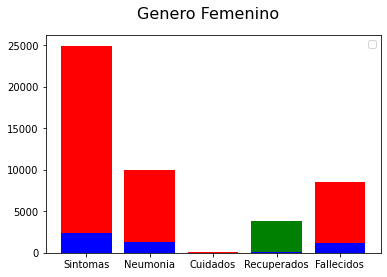

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Genero Femenino', fontsize=16)

ax.bar('Sintomas',sintomas_adultos,color='r')
ax.bar('Sintomas',len(sintomas_menores_F),color='g')
ax.bar('Sintomas',sintomas_mayores,color='b')
ax.bar('Neumonia',len(nuemonia_adultos_F),color='r')
ax.bar('Neumonia',len(neumonia_menores_F),color='g')
ax.bar('Neumonia',len(nuemonia_mayores_F),color='b')
ax.bar('Cuidados',len(cuidados_adultos_F),color='r')
ax.bar('Cuidados',len(ciudados_menores_F),color='g')
ax.bar('Cuidados',len(cuidados_mayores_F),color='b')
ax.bar('Recuperados',len(recuperados_adultos_F),color='r')
ax.bar('Recuperados',len(recuperados_menores_F),color='g')
ax.bar('Recuperados',len(recuperados_mayores_F),color='b')
ax.bar('Fallecidos',len(fallecidos_adultos_F),color='r')
ax.bar('Fallecidos',len(fallecidos_menores_F),color='g')
ax.bar('Fallecidos',len(fallecidos_mayores_F),color='b')




ax.legend()


No handles with labels found to put in legend.


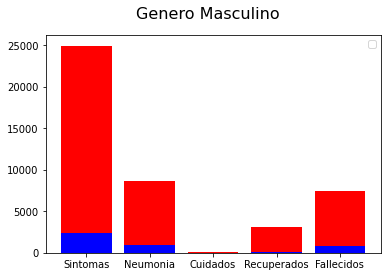

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Genero Masculino', fontsize=16)

ax.bar('Sintomas',sintomas_adultos,color='r')
ax.bar('Sintomas',len(sintomas_menores_M),color='g')
ax.bar('Sintomas',sintomas_mayores,color='b')
ax.bar('Neumonia',len(nuemonia_adultos_M),color='r')
ax.bar('Neumonia',len(neumonia_menores_M),color='g')
ax.bar('Neumonia',len(nuemonia_mayores_M),color='b')
ax.bar('Cuidados',len(cuidados_adultos_M),color='r')
ax.bar('Cuidados',len(ciudados_menores_M),color='g')
ax.bar('Cuidados',len(cuidados_mayores_M),color='b')
ax.bar('Recuperados',len(recuperados_adultos_M),color='r')
ax.bar('Recuperados',len(recuperados_menores_M),color='g')
ax.bar('Recuperados',len(recuperados_mayores_M),color='b')
ax.bar('Fallecidos',len(fallecidos_adultos_M),color='r')
ax.bar('Fallecidos',len(fallecidos_menores_M),color='g')
ax.bar('Fallecidos',len(fallecidos_mayores_M),color='b')


ax.legend()




In [6]:


tabla=pd.DataFrame(columns=('Total','Sintomas','Neumonia','Cuidados Intensivos','Recuperados','Fallecidos'))
tabla.loc[len(tabla)]=[total_manores,sintomas_menores,neumonia_menores,cuidades_menores,recuperados_menores,fallecidos_menores]
tabla=tabla.rename(index={0:'Menores'})

tabla.loc[len(tabla)]=[total_adultos,sintomas_adultos,neumonia_adultos,cuidados_adultos,recuperados_adultos,fallecidos_adultos]
tabla=tabla.rename(index={1:'Adultos'})

tabla.loc[len(tabla)]=[total_mayores,sintomas_mayores,neummonia_mayores,cuidados_mayores,recuperados_mayores,fallecidos_mayores]
tabla=tabla.rename(index={2:'Mayores'})
tabla
tabla

Total Sintomas Neumonia Cuidados Intensivos Recuperados Fallecidos
Menores   7437      363      277                   3        3903        232
Adultos  24952    24952    18713                 178        6812      16056
Mayores   2437     2437     2335                  21         168       2007